<a href="https://colab.research.google.com/github/Juaano28/Parcial01_TAM/blob/main/Parcial01_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 01

**Curso:** Teoria de Aprendizaje de Maquinas (TAM)

**Profesor:** Andres Marino Alvarez

**Estudiante:** Juan Esteban Lopez

**Fecha:** Mayo 23, 2025

# Modelos de Regresion


# Demostración de Modelos de Regresión

## 1. **Mínimos Cuadrados Ordinarios (OLS)**

**Problema de Optimización:**  
Minimizar la suma de errores cuadráticos:  
$$
\min_{\mathbf{w}} \sum_{n=1}^N \left(t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top \right)^2
$$

**Derivación:**  
1. **Forma Matricial:**  
   Sea $\mathbf{\Phi}$ la matriz de diseño con filas $\phi(\mathbf{x}_n) \in \mathbb{R}^Q$, y $\mathbf{t} = [t_1, \dots, t_N]^\top$.  
   El objetivo se reescribe como:  
   $$
   \min_{\mathbf{w}} \|\mathbf{t} - \mathbf{\Phi}\mathbf{w}\|^2
   $$

2. **Derivada del Error:**  
   Expandimos el término cuadrático:  
   $$
   L(\mathbf{w}) = (\mathbf{t} - \mathbf{\Phi}\mathbf{w})^\top (\mathbf{t} - \mathbf{\Phi}\mathbf{w})
   $$  
   Calculamos el gradiente respecto a $\mathbf{w}$:  
   $$
   \nabla_{\mathbf{w}} L = -2 \mathbf{\Phi}^\top (\mathbf{t} - \mathbf{\Phi}\mathbf{w})
   $$  
   Igualando a cero:  
   $$
   \mathbf{\Phi}^\top \mathbf{\Phi} \mathbf{w} = \mathbf{\Phi}^\top \mathbf{t}
   $$

3. **Solución Cerrada:**  
   Si $\mathbf{\Phi}^\top \mathbf{\Phi}$ es invertible:  
   $$
   \mathbf{w}_{\text{OLS}} = (\mathbf{\Phi}^\top \mathbf{\Phi})^{-1} \mathbf{\Phi}^\top \mathbf{t}
   $$

---

## 2. **Mínimos Cuadrados Regularizados (Ridge)**

**Problema de Optimización:**  
Incluye regularización $L_2$ para evitar sobreajuste:  
$$
\min_{\mathbf{w}} \left( \|\mathbf{t} - \mathbf{\Phi}\mathbf{w}\|^2 + \lambda \|\mathbf{w}\|^2 \right)
$$

**Derivación:**  
1. **Función Objetivo:**  
   $$
   L(\mathbf{w}) = (\mathbf{t} - \mathbf{\Phi}\mathbf{w})^\top (\mathbf{t} - \mathbf{\Phi}\mathbf{w}) + \lambda \mathbf{w}^\top \mathbf{w}
   $$

2. **Gradiente:**  
   $$
   \nabla_{\mathbf{w}} L = -2 \mathbf{\Phi}^\top (\mathbf{t} - \mathbf{\Phi}\mathbf{w}) + 2\lambda \mathbf{w}
   $$  
   Igualando a cero:  
   $$
   (\mathbf{\Phi}^\top \mathbf{\Phi} + \lambda \mathbf{I}) \mathbf{w} = \mathbf{\Phi}^\top \mathbf{t}
   $$

3. **Solución:**  
   $$
   \mathbf{w}_{\text{Ridge}} = (\mathbf{\Phi}^\top \mathbf{\Phi} + \lambda \mathbf{I})^{-1} \mathbf{\Phi}^\top \mathbf{t}
   $$

---

## 3. **Máxima Verosimilitud (ML)**

**Supuestos:**  
- Ruido $\eta_n \sim \mathcal{N}(0, \sigma_\eta^2)$.  
- Datos i.i.d. $\implies$ Verosimilitud factorizable.  

**Derivación:**  
1. **Verosimilitud:**  
   $$
   p(\mathbf{t}|\mathbf{w}, \sigma_\eta^2) = \prod_{n=1}^N \mathcal{N}(t_n | \phi(\mathbf{x}_n)\mathbf{w}^\top, \sigma_\eta^2)
   $$

2. **Log-Verossimilhança:**  
   $$
   \log p(\mathbf{t}|\mathbf{w}) = -\frac{1}{2\sigma_\eta^2} \sum_{n=1}^N (t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top)^2 - \frac{N}{2} \log(2\pi \sigma_\eta^2)
   $$

3. **Optimización:**  
   Maximizar $\log p(\mathbf{t}|\mathbf{w})$ equivale a minimizar $\sum_{n=1}^N (t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top)^2$.  
   Por tanto:  
   $$
   \mathbf{w}_{\text{ML}} = \mathbf{w}_{\text{OLS}}
   $$

---

## 4. **Máximo a Posteriori (MAP)**

**Supuestos:**  
- Previa Gaussiana: $\mathbf{w} \sim \mathcal{N}(\mathbf{0}, \tau^2 \mathbf{I})$.  
- Posterior: $p(\mathbf{w}|\mathbf{t}) \propto p(\mathbf{t}|\mathbf{w}) p(\mathbf{w})$.  

**Derivación:**  
1. **Log-Posterior:**  
   $$
   \log p(\mathbf{w}|\mathbf{t}) = \log p(\mathbf{t}|\mathbf{w}) + \log p(\mathbf{w}) + \text{const.}
   $$  
   Sustituyendo:  
   $$
   \log p(\mathbf{w}|\mathbf{t}) = -\frac{1}{2\sigma_\eta^2} \|\mathbf{t} - \mathbf{\Phi}\mathbf{w}\|^2 - \frac{1}{2\tau^2} \|\mathbf{w}\|^2
   $$

2. **Optimización:**  
   Equivale a Ridge con $\lambda = \sigma_\eta^2 / \tau^2$:  
   $$
   \mathbf{w}_{\text{MAP}} = (\mathbf{\Phi}^\top \mathbf{\Phi} + \frac{\sigma_\eta^2}{\tau^2} \mathbf{I})^{-1} \mathbf{\Phi}^\top \mathbf{t}
   $$

---

## 5. **Modelo Bayesiano Lineal Gaussiano**

**Supuestos:**  
- Previa $\mathbf{w} \sim \mathcal{N}(\mathbf{0}, \tau^2 \mathbf{I})$.  
- Verosimilitud Gaussiana.  

**Derivación:**  
1. **Distribución Posterior:**  
   Por conjugación Gaussiana:  
   $$
   p(\mathbf{w}|\mathbf{t}) = \mathcal{N}(\mathbf{w} | \boldsymbol{\mu}_w, \boldsymbol{\Sigma}_w)
   $$  
   Donde:  
   $$
   \boldsymbol{\Sigma}_w^{-1} = \frac{1}{\sigma_\eta^2} \mathbf{\Phi}^\top \mathbf{\Phi} + \frac{1}{\tau^2} \mathbf{I}
   $$  
   $$
   \boldsymbol{\mu}_w = \frac{1}{\sigma_\eta^2} \boldsymbol{\Sigma}_w \mathbf{\Phi}^\top \mathbf{t}
   $$

2. **Predicción:**  
   Para un nuevo punto $\mathbf{x}_{\text{new}}$:  
   $$
   p(t_{\text{new}} | \mathbf{x}_{\text{new}}, \mathcal{D}) = \mathcal{N}\left(t_{\text{new}} | \phi(\mathbf{x}_{\text{new}})\boldsymbol{\mu}_w, \phi(\mathbf{x}_{\text{new}})\boldsymbol{\Sigma}_w \phi(\mathbf{x}_{\text{new}})^\top + \sigma_\eta^2\right)
   $$

---

## 6. **Regresión Rígida Kernel (Kernel Ridge)**

**Truco del Kernel:**  
Mapear $\phi(\mathbf{x}) \to k(\mathbf{x}, \mathbf{x}') = \phi(\mathbf{x})\phi(\mathbf{x}')^\top$ para evitar cálculo explícito de $\phi(\mathbf{x})$.  

**Derivación:**  
1. **Formulación Dual:**  
   Expresar $\mathbf{w}$ como combinación lineal: $\mathbf{w} = \sum_{n=1}^N \alpha_n \phi(\mathbf{x}_n)$.  
   Sustituyendo en Ridge:  
   $$
   \min_{\boldsymbol{\alpha}} \|\mathbf{t} - \mathbf{K}\boldsymbol{\alpha}\|^2 + \lambda \boldsymbol{\alpha}^\top \mathbf{K} \boldsymbol{\alpha}
   $$  
   Donde $\mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j)$.  

2. **Solución:**  
   Derivando respecto a $\boldsymbol{\alpha}$:  
   $$
   (\mathbf{K} + \lambda \mathbf{I}) \boldsymbol{\alpha} = \mathbf{t} \implies \boldsymbol{\alpha} = (\mathbf{K} + \lambda \mathbf{I})^{-1} \mathbf{t}
   $$

---

## 7. **Procesos Gaussianos (GP)**

**Modelo:**  
- $\mathbf{t} \sim \mathcal{GP}(0, k(\mathbf{x}, \mathbf{x}') + \sigma_\eta^2 \delta_{ij})$, donde $\delta_{ij}$ es la delta de Kronecker.  

**Predicción:**  
1. **Distribución Conjunta:**  
   Para datos $\mathcal{D}$ y nuevo punto $\mathbf{x}_{\text{new}}$:  
   $$
   \begin{bmatrix}
   \mathbf{t} \\
   t_{\text{new}}
   \end{bmatrix} \sim \mathcal{N}\left(
   \mathbf{0},
   \begin{bmatrix}
   \mathbf{K} + \sigma_\eta^2 \mathbf{I} & \mathbf{k}_* \\
   \mathbf{k}_*^\top & k(\mathbf{x}_{\text{new}}, \mathbf{x}_{\text{new}})
   \end{bmatrix}
   \right)
   $$  
   Donde $\mathbf{k}_* = [k(\mathbf{x}_{\text{new}}, \mathbf{x}_1), \dots, k(\mathbf{x}_{\text{new}}, \mathbf{x}_N)]^\top$.  

2. **Distribución Condicional:**  
   Usando propiedades de Gaussianas:  
   $$
   p(t_{\text{new}} | \mathbf{x}_{\text{new}}, \mathcal{D}) = \mathcal{N}(t_{\text{new}} | \mu, \sigma^2)
   $$  
   Con:  
   $$
   \mu = \mathbf{k}_*^\top (\mathbf{K} + \sigma_\eta^2 \mathbf{I})^{-1} \mathbf{t}
   $$  
   $$
   \sigma^2 = k(\mathbf{x}_{\text{new}}, \mathbf{x}_{\text{new}}) - \mathbf{k}_*^\top (\mathbf{K} + \sigma_\eta^2 \mathbf{I})^{-1} \mathbf{k}_*
   $$

---

## **Comparación de Modelos**

| **Modelo**               | **Estimación**       | **Regularización** | **Incertidumbre** | **Espacio**      | **Complejidad** |  
|--------------------------|----------------------|--------------------|--------------------|------------------|-----------------|  
| **OLS**                  | Puntual              | No                 | No                 | Lineal           | $\mathcal{O}(Q^3)$ |  
| **Ridge**                | Puntual              | $L_2$              | No                 | Lineal           | $\mathcal{O}(Q^3)$ |  
| **MAP**                  | Puntual              | Implícita (priori) | No                 | Lineal           | $\mathcal{O}(Q^3)$ |  
| **Bayesiano**            | Distribución         | Sí                 | Sí                 | Lineal           | $\mathcal{O}(Q^3)$ |  
| **Kernel Ridge**         | Puntual              | $L_2$              | No                 | No-lineal        | $\mathcal{O}(N^3)$ |  
| **Procesos Gaussianos**  | Distribución         | Kernel             | Sí                 | No-lineal        | $\mathcal{O}(N^3)$ |  

**Conclusiones Clave:**  
1. **Lineal vs No-Lineal:** OLS, Ridge, MAP y Bayesiano son lineales en parámetros. Kernel Ridge y GP capturan no-linealidades mediante kernels.  
2. **Incertidumbre:** Solo modelos Bayesianos y GP proporcionan intervalos de confianza.  
3. **Regularización:** Ridge y MAP penalizan normas $L_2$, mientras GP regulariza mediante elección de kernel.  
4. **Costo Computacional:** Modelos con kernels (Kernel Ridge, GP) escalan cúbicamente con $N$, no con $Q$.  

**Prompt :** "*Estoy desarrollando un parcial acerca de los conceptos basicos de machine learning, para este tenemos que aplicar los conceptos vistos en clase a una base de datos llamada "Ames Housing Dataset". quiero que me ayudas a desarrollar este ejercicio paso a paso, primero tenemos que hacer una etapa de preproceso entonces dame inicialmente un codigo para cargar la base de datos y para poder visualizar sus caracteristicas.*"

In [89]:
#from google.colab import files
#uploaded = files.upload()


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [91]:
# Cargar el dataset
df = pd.read_csv("/content/AmesHousing.csv")

# Mostrar las dimensiones del dataframe
print("Dimensiones del dataset:", df.shape)

# Mostrar las primeras filas
df.head()


Dimensiones del dataset: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [92]:
# Información general de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [95]:
# Estadísticas de columnas numéricas
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [96]:
# Contar valores faltantes por columna
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Mostrar columnas con valores nulos
missing_values

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Cond,159
Garage Yr Blt,159


#Preproceso

**Prompt :** "*ahora, haremos la etapa de preprocesamiento, para esto tendremos en cuenta aquellas caracteristicas en las cuales hay muchos valores nulos o faltantes (>1400 datos) y las podremos eliminar. haz un codigo que realice este objetivo*"

**Nota :** *Al sacar la lista de las caracteristicas con valores faltantes se pudo observar que algunas variables les hacia falta mas de la mitad de los valores, en estos casos es mejor desechar estas columnas ya que si se imputan valores o se rellenan no sabemos que tan confiable sean estas y que resultado pueden generar*

In [97]:
# Calcular cantidad de valores faltantes por columna
missing_counts = df.isnull().sum()

# Filtrar columnas con más de 1400 valores faltantes
cols_to_drop = missing_counts[missing_counts > 1400].index.tolist()

print(f"Columnas a eliminar (más de 1400 valores faltantes):\n{cols_to_drop}")

# Eliminar columnas con muchos valores nulos
df = df.drop(columns=cols_to_drop)

# Confirmar nueva forma del dataset
print("Dimensiones después de eliminar columnas:", df.shape)


Columnas a eliminar (más de 1400 valores faltantes):
['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
Dimensiones después de eliminar columnas: (2930, 76)


**Prompt :** "*ahora, trataremos las variables con datos faltantes menores al 50%, para variables numericas utilizaremos la mediana ya que nos da un robustes frente a los valor atipicos y para variables categoricas utilizaremos la moda. dame el codigo en una unica celda de codigo y que muestre las variables imputadas y con que se imputaron.*"

**Nota :** *Ahora, con el resto de variables que tenemos con valores faltantes y que tienen por lo menos la mitad de los datos validos lo que hacemos es rellenarlos. si la variable o caracteristica es categorica lo que hacemos es rellenar los valores nulos con la moda, peri si la variable es numerica lo que hacemos es rellenar estos espacios con la mediana*

In [98]:
# Umbral de 50% de datos faltantes
threshold = 0.5 * len(df)

# Identificar columnas con valores nulos por debajo del umbral
missing_cols = df.columns[df.isnull().sum() > 0]
cols_below_threshold = [col for col in missing_cols if df[col].isnull().sum() < threshold]

# Imputar valores faltantes
print("Variables imputadas:\n")
for col in cols_below_threshold:
    if df[col].dtype in ['float64', 'int64']:
        impute_value = df[col].median()
        df[col].fillna(impute_value, inplace=True)
        print(f" - {col}: imputado con MEDIANA = {impute_value}")
    else:
        impute_value = df[col].mode()[0]
        df[col].fillna(impute_value, inplace=True)
        print(f" - {col}: imputado con MODA = '{impute_value}'")

# Verificación final
total_missing = df.isnull().sum().sum()
print(f"\nValores faltantes restantes en el dataset: {total_missing}")

Variables imputadas:

 - Lot Frontage: imputado con MEDIANA = 68.0
 - Mas Vnr Area: imputado con MEDIANA = 0.0
 - Bsmt Qual: imputado con MODA = 'TA'
 - Bsmt Cond: imputado con MODA = 'TA'
 - Bsmt Exposure: imputado con MODA = 'No'
 - BsmtFin Type 1: imputado con MODA = 'GLQ'
 - BsmtFin SF 1: imputado con MEDIANA = 370.0
 - BsmtFin Type 2: imputado con MODA = 'Unf'
 - BsmtFin SF 2: imputado con MEDIANA = 0.0
 - Bsmt Unf SF: imputado con MEDIANA = 466.0
 - Total Bsmt SF: imputado con MEDIANA = 990.0
 - Electrical: imputado con MODA = 'SBrkr'
 - Bsmt Full Bath: imputado con MEDIANA = 0.0
 - Bsmt Half Bath: imputado con MEDIANA = 0.0
 - Garage Type: imputado con MODA = 'Attchd'
 - Garage Yr Blt: imputado con MEDIANA = 1979.0
 - Garage Finish: imputado con MODA = 'Unf'
 - Garage Cars: imputado con MEDIANA = 2.0
 - Garage Area: imputado con MEDIANA = 480.0
 - Garage Qual: imputado con MODA = 'TA'
 - Garage Cond: imputado con MODA = 'TA'

Valores faltantes restantes en el dataset: 0


<ipython-input-98-422966dbb3e3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(impute_value, inplace=True)
<ipython-input-98-422966dbb3e3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Prompt :** "**Codificacion de variables categoricas**:
Usaremos one-hot encoding para variables nominales (por ejemplo, Neighborhood, Exterior1st) con pd.get_dummies() o sklearn.preprocessing.OneHotEncoder.*

*Usaremos codificación ordinal para variables ordinales (por ejemplo, ExterQual, KitchenQual) con un mapeo personalizado (por ejemplo, Poor=0, Fair=1, Good=2, Excellent=3).*

*Tener en cuenta que One-hot encoding puede generar muchas columnas, lo que puede afectar la eficiencia computacional, especialmente para modelos como Gaussian Process.*"

In [99]:
from sklearn.preprocessing import OneHotEncoder

# --- Parte 1: Codificación Ordinal ---

# Mapeos personalizados para variables ordinales
ordinal_mappings = {
    "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "ExterCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "BsmtQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "BsmtCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "HeatingQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "FireplaceQu": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "GarageQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
    "GarageCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
}

# Aplicar mapeo ordinal
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"{col}: codificado ordinalmente")

# --- Parte 2: One-hot encoding ---

# Selección de variables categóricas nominales
# Excluir las que ya fueron codificadas ordinalmente
nominal_cols = df.select_dtypes(include="object").columns
nominal_cols = [col for col in nominal_cols if col not in ordinal_mappings]

# Aplicar one-hot encoding directamente con pandas
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print("\nOne-hot encoding aplicado a variables nominales:", nominal_cols)
print(f"Dimensiones del dataset tras codificación: {df.shape}")



One-hot encoding aplicado a variables nominales: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']
Dimensiones del dataset tras codificación: (2930, 245)


**Prompt :** "*Escalado de caracteristicas: Aplicaremos StandardScaler o MinMaxScaler a características numéricas para asegurar comparabilidad, especialmente para modelos sensibles a la escala (por ejemplo, LinearRegression, SVM, SGDRegressor)."*

**Nota :** *El escalado es crítico para modelos basados en distancias por ejemplo, SVM, KernelRidge y modelos basados en gradientes por ejemplo, SGDRegressor.*

In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Elegir escalador: cambia a MinMaxScaler() si lo prefieres
scaler = StandardScaler()

# Seleccionar solo las columnas numéricas (excluyendo la variable objetivo)
target = "SalePrice"
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)

# Ajustar y transformar
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Escalado aplicado a las siguientes columnas numéricas:")
print(list(numeric_cols))


Escalado aplicado a las siguientes columnas numéricas:
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


**Prompt :** "*Crea nuevas variables o caracteristicas que nos permitan tener un mejor analisis de los datos y agrega las a la base de datos*"


In [102]:
# Crear nuevas variables (feature engineering) con nombres corregidos

df["HouseAge"] = df["Yr Sold"] - df["Year Built"]
df["RemodelAge"] = df["Yr Sold"] - df["Year Remod/Add"]

df["TotalBath"] = (
    df["Full Bath"]
    + 0.5 * df["Half Bath"]
    + df["Bsmt Full Bath"]
    + 0.5 * df["Bsmt Half Bath"]
)

df["TotalSF"] = df["Total Bsmt SF"] + df["1st Flr SF"] + df["2nd Flr SF"]

df["QualitySF"] = df["Overall Qual"] * df["Gr Liv Area"]

df["HasBasement"] = (df["Total Bsmt SF"] > 0).astype(int)
df["HasGarage"] = (df["Garage Area"] > 0).astype(int)
df["HasFireplace"] = (df["Fireplaces"] > 0).astype(int)
df["HasPool"] = (df["Pool Area"] > 0).astype(int)

# Mostrar las primeras filas con las nuevas columnas
new_features = ["HouseAge", "RemodelAge", "TotalBath", "TotalSF", "QualitySF",
                "HasBasement", "HasGarage", "HasFireplace", "HasPool"]

df[new_features].head()


,HouseAge,RemodelAge,TotalBath,TotalSF,QualitySF,HasBasement,HasGarage,HasFireplace,HasPool
0,2.054036,2.841987,-0.442629,0.548310,-0.020799,1,1,1,0
1,2.020967,2.794041,-2.348580,-1.840860,0.926970,0,1,0,0
2,2.120173,2.937879,-1.353641,0.279062,0.022713,1,0,0,0
3,1.789487,2.458418,2.361131,4.045425,0.774712,1,1,1,0
4,0.830499,1.020033,0.455180,-0.018139,-0.198555,0,1,1,0


#Analisis Exploratorio

**Prompt :** "*Ahora haremos un analisis exploratorio de los datos con EDA (scatter plot, boxplot, matriz de correlacion), recuerda que nuestro target es "SalePrice" y que esta variable puede tener sesgo.*"


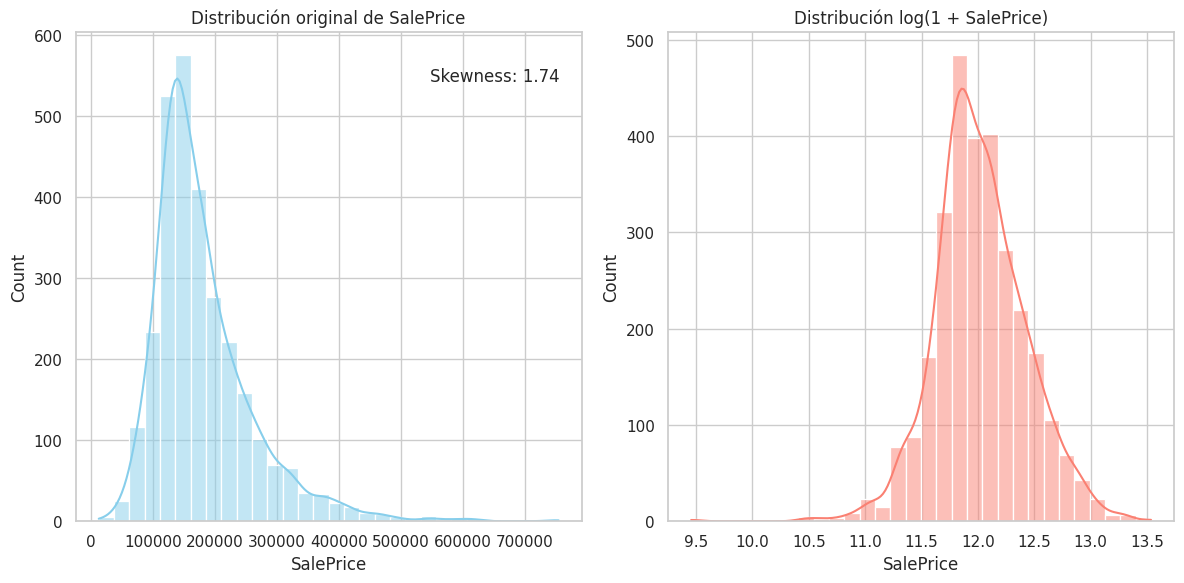

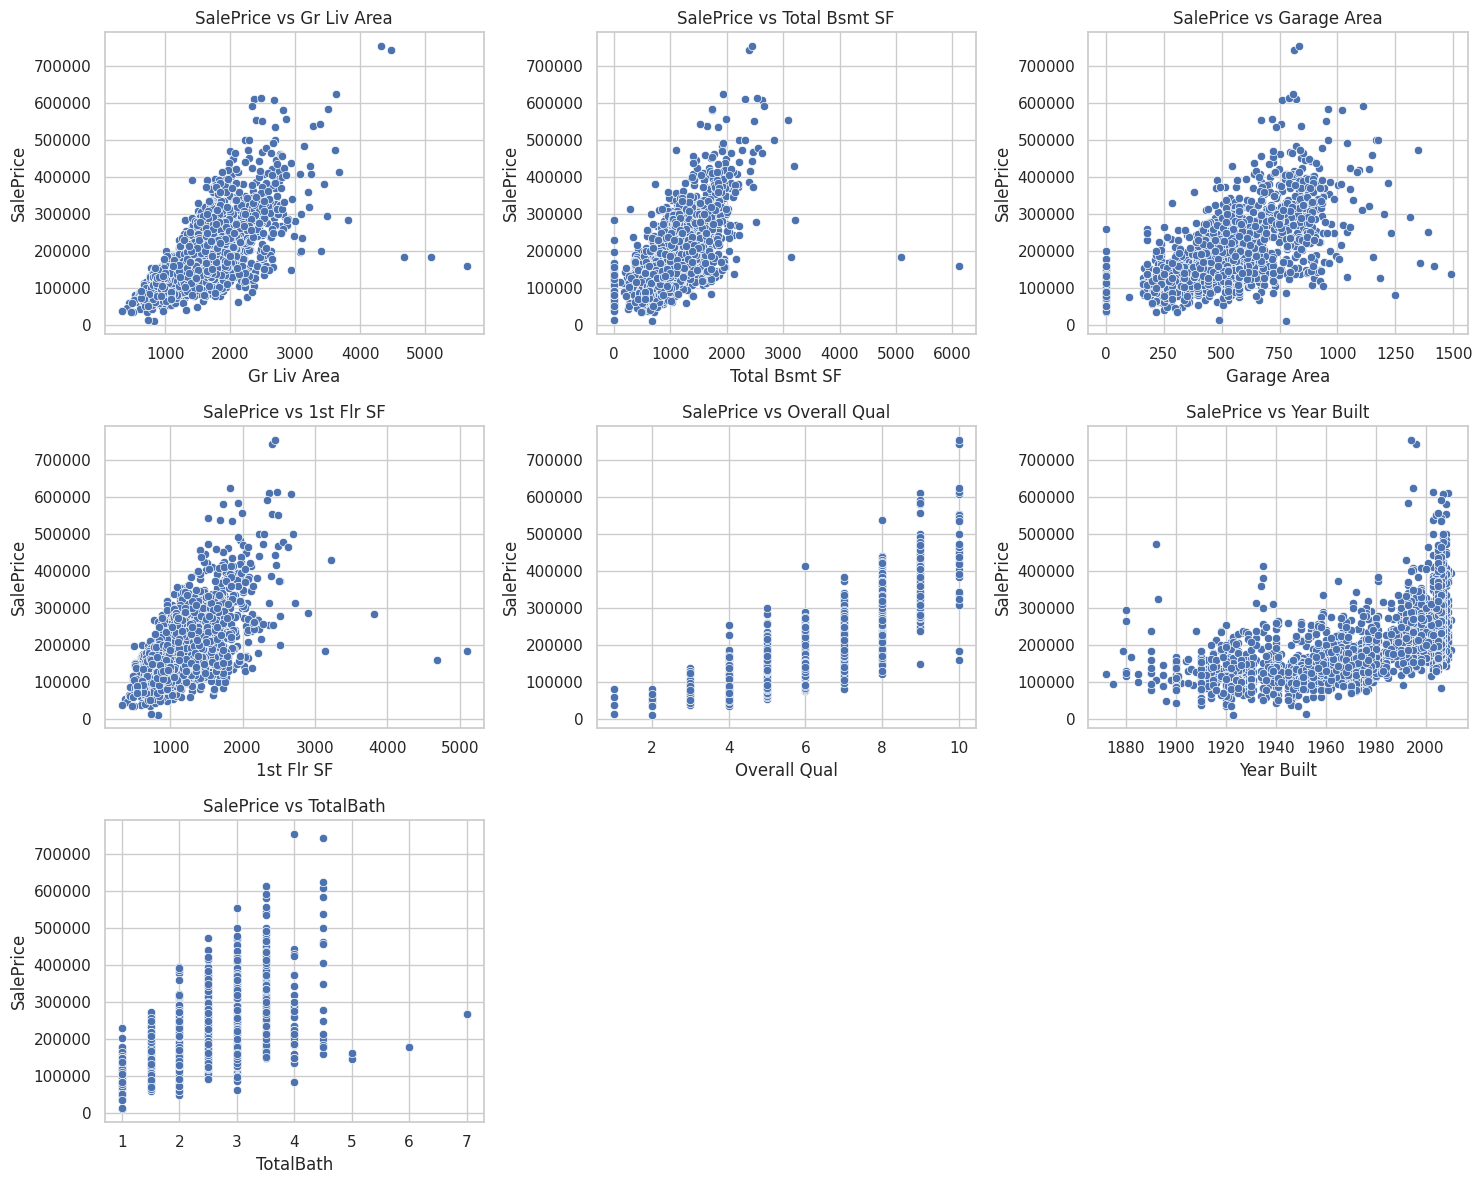

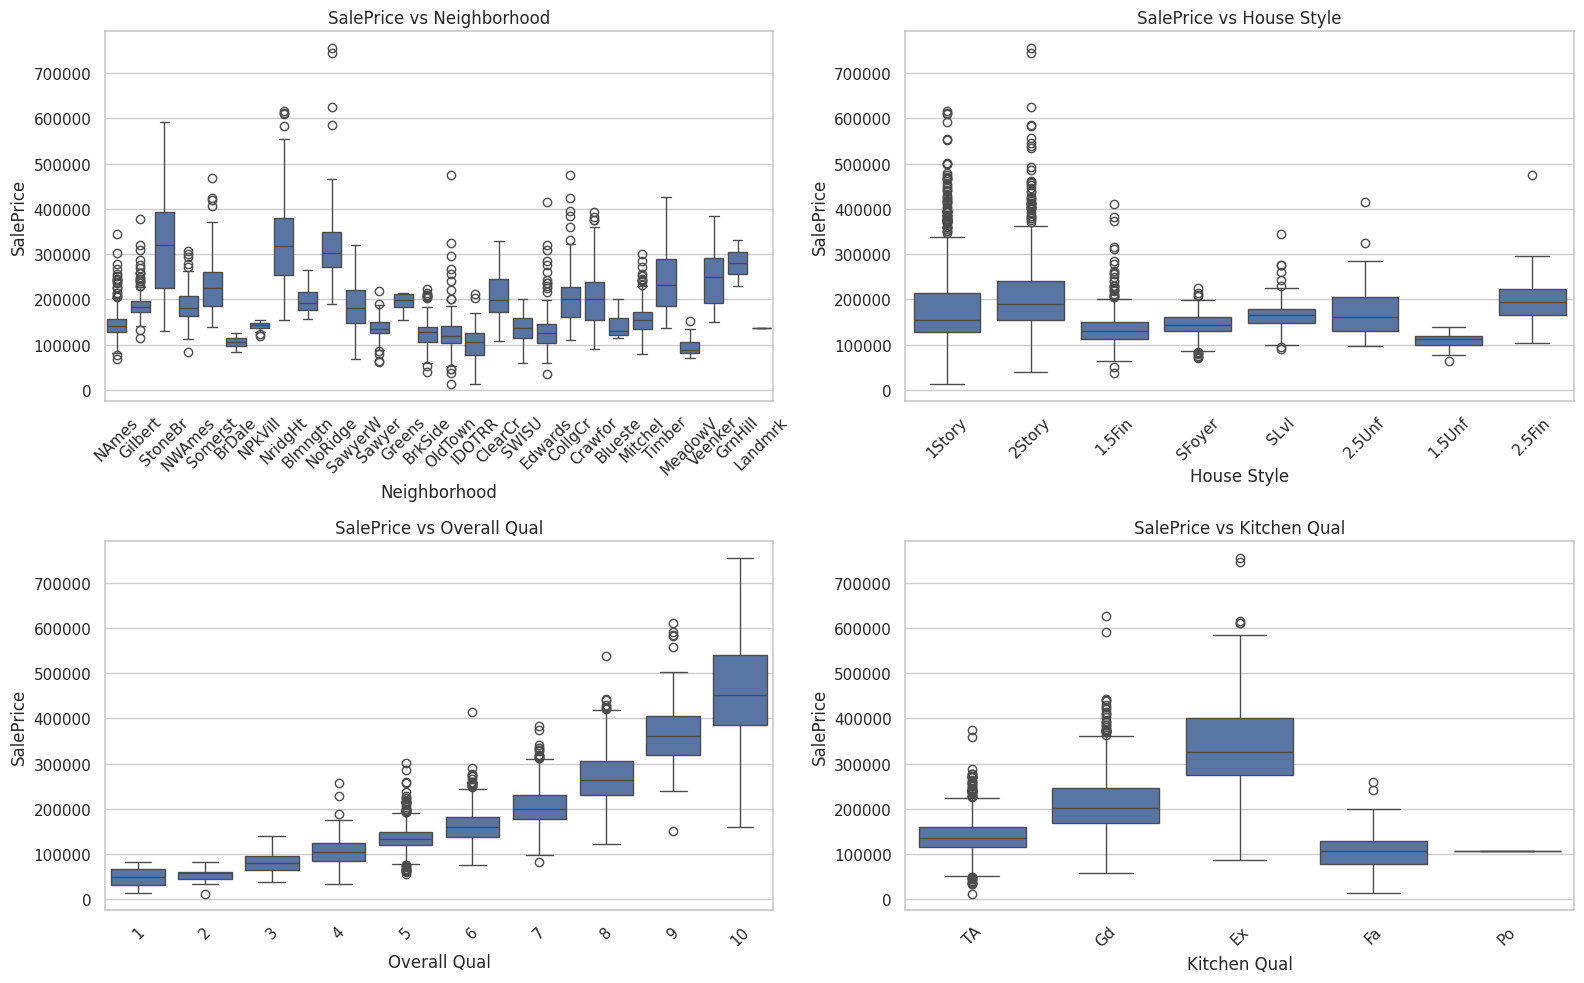

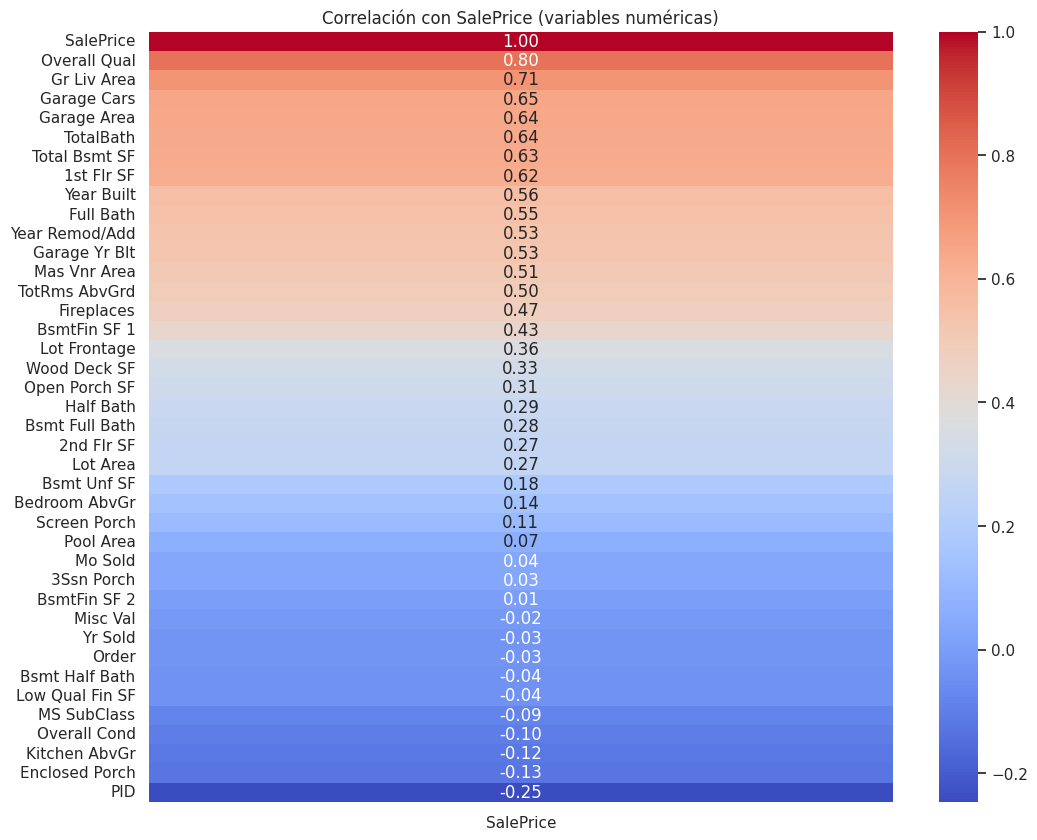

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import math

# Cargamos el dataset original si no lo tenías guardado antes (ajusta la ruta si es necesario)
df_orig = pd.read_csv("/content/AmesHousing.csv")

# Crear variable TotalBath (como en el feature engineering anterior)
df_orig["TotalBath"] = (
    df_orig["Full Bath"] + 0.5 * df_orig["Half Bath"] +
    df_orig["Bsmt Full Bath"] + 0.5 * df_orig["Bsmt Half Bath"]
)

# Variables numéricas para análisis
num_vars = ["Gr Liv Area", "Total Bsmt SF", "Garage Area", "1st Flr SF", "Overall Qual", "Year Built", "TotalBath", "SalePrice"]
cat_vars = ["Neighborhood", "House Style", "Overall Qual", "Kitchen Qual"]

# --- 1. Distribución de SalePrice ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_orig["SalePrice"], kde=True, bins=30, color="skyblue")
plt.title("Distribución original de SalePrice")
plt.annotate(f"Skewness: {skew(df_orig['SalePrice'].dropna()):.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_orig["SalePrice"]), kde=True, bins=30, color="salmon")
plt.title("Distribución log(1 + SalePrice)")
plt.tight_layout()
plt.show()

# --- 2. Scatter plots dinámicos ---
n = len(num_vars) - 1  # sin incluir SalePrice
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(5 * cols, 4 * rows))
for i, var in enumerate(num_vars[:-1]):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df_orig[var], y=df_orig["SalePrice"])
    plt.title(f"SalePrice vs {var}")
plt.tight_layout()
plt.show()

# --- 3. Boxplots para categóricas ---
plt.figure(figsize=(16, 10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y="SalePrice", data=df_orig)
    plt.title(f"SalePrice vs {var}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Matriz de correlación numérica ---
plt.figure(figsize=(12, 10))
num_corr = df_orig.select_dtypes(include=[np.number]).corr()
sns.heatmap(num_corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación con SalePrice (variables numéricas)")
plt.show()


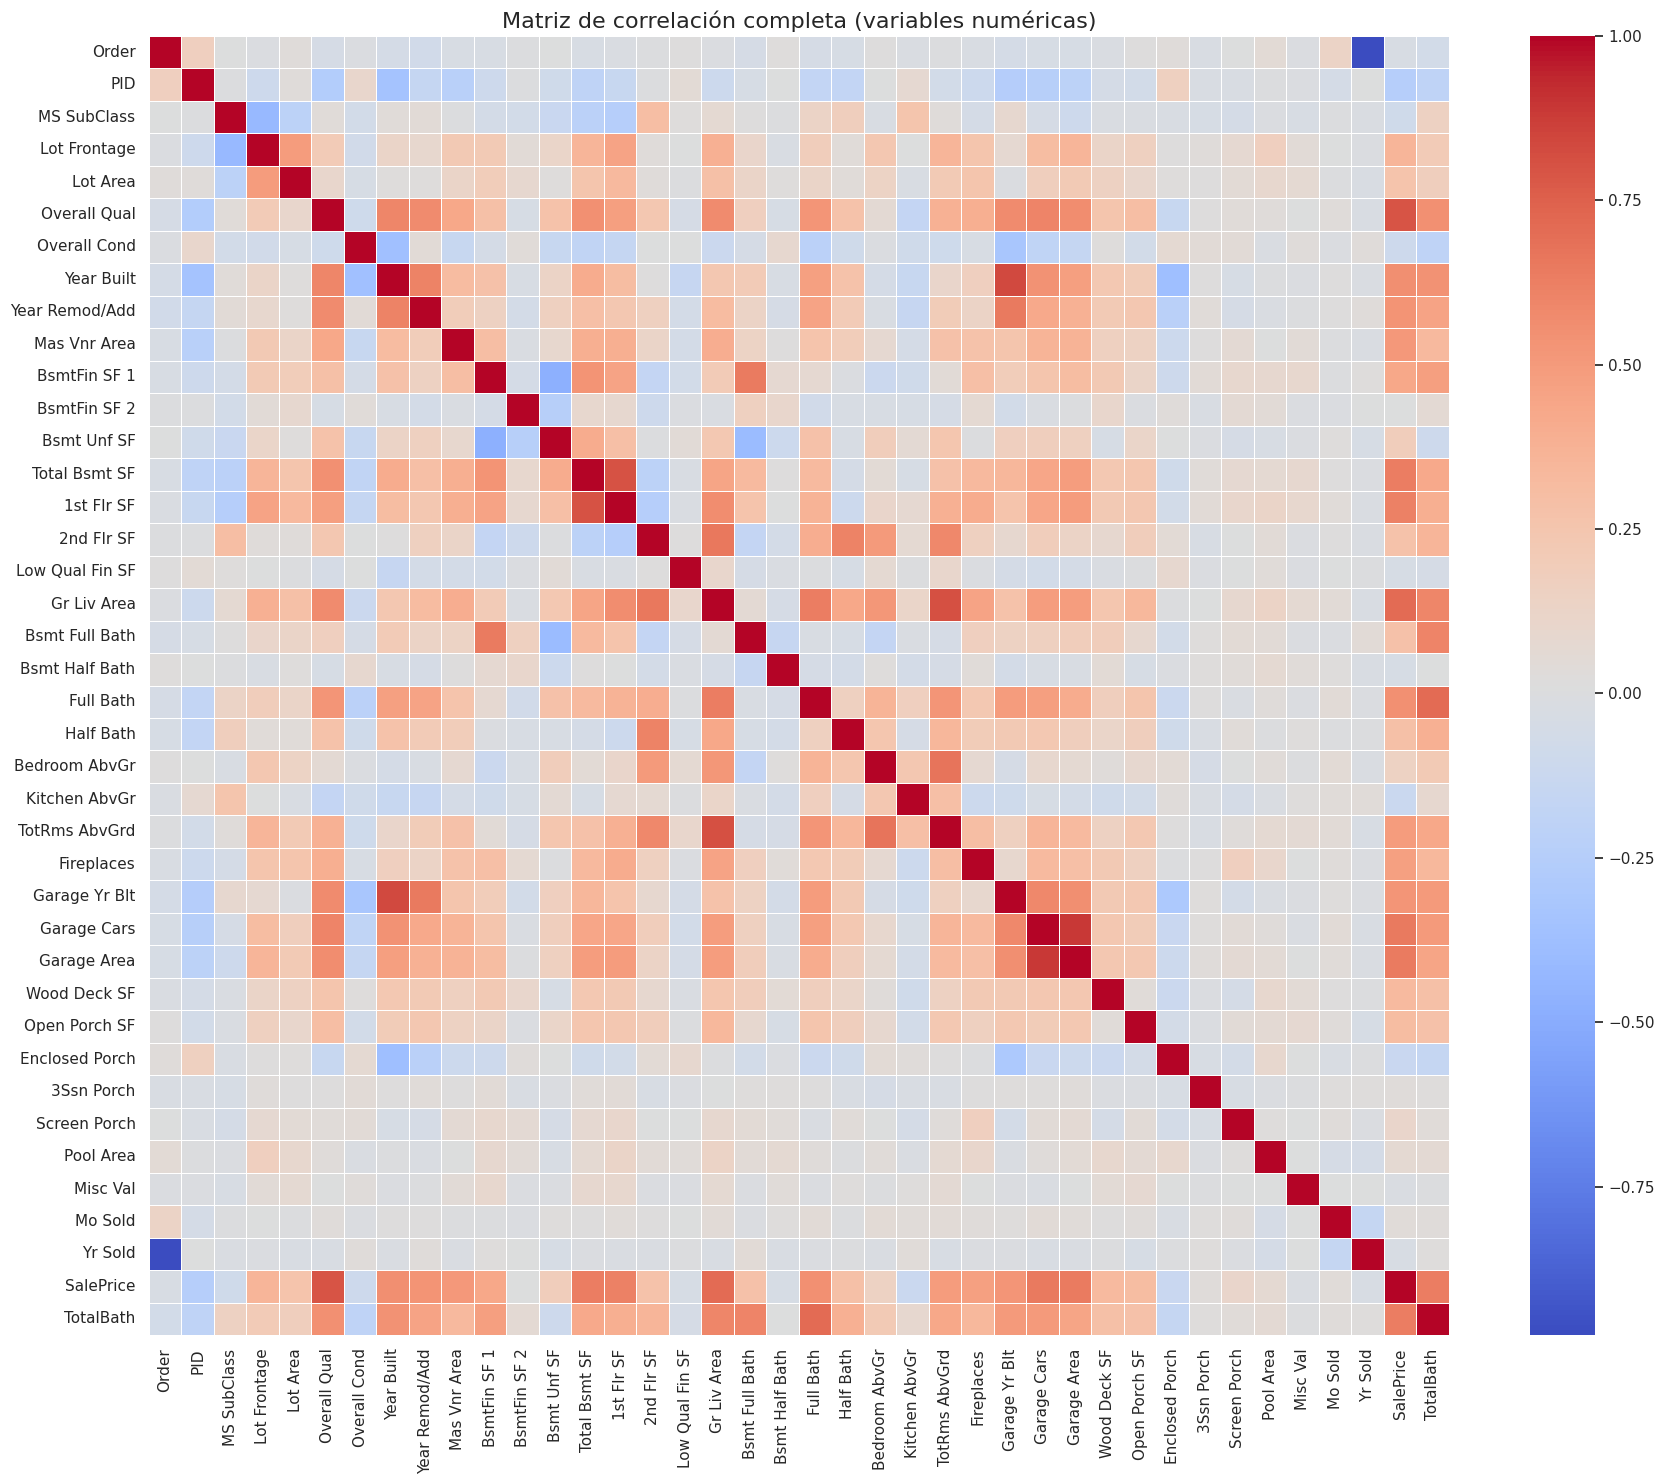

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular matriz de correlación para todas las variables numéricas
corr_matrix = df_orig.select_dtypes(include=[np.number]).corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 15))

# Crear el heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Título
plt.title("Matriz de correlación completa (variables numéricas)", fontsize=16)
plt.tight_layout()
plt.show()


## Matriz de Correlacion con **One-Hot encondig**

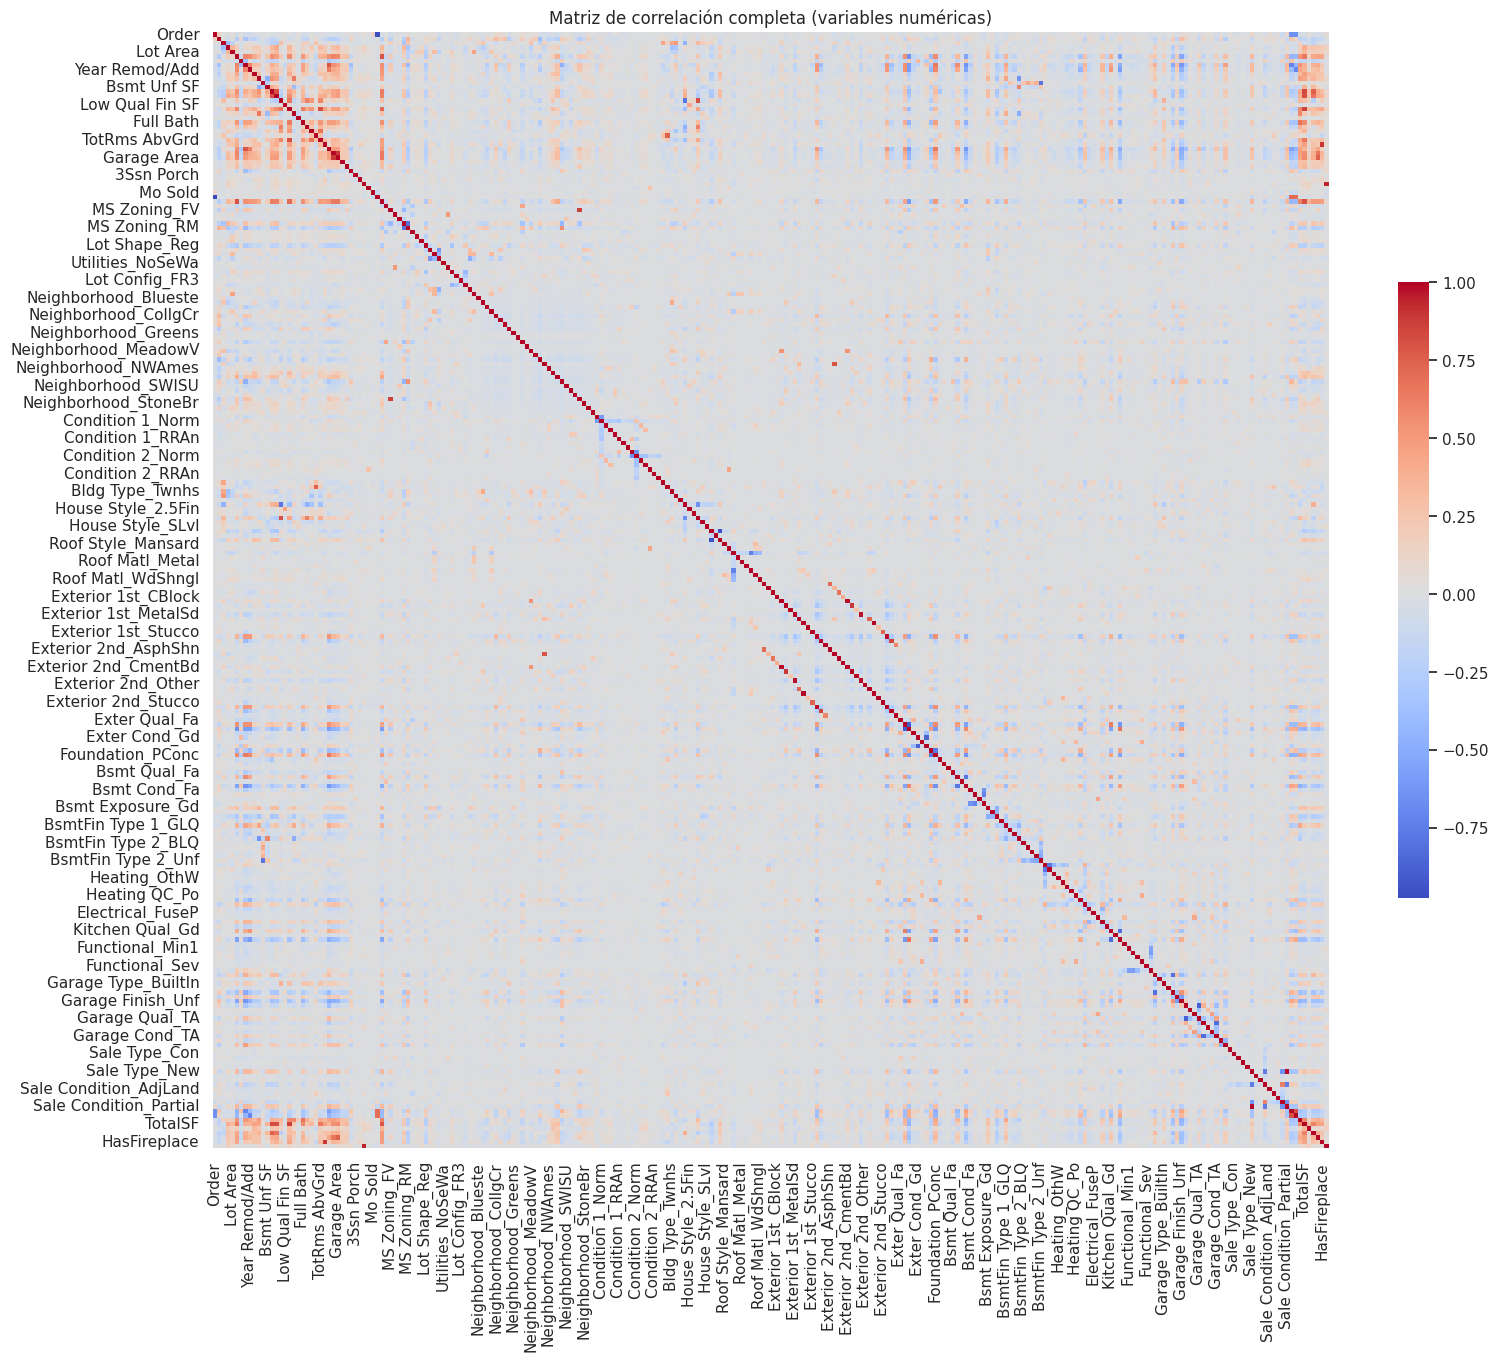

In [110]:
plt.figure(figsize=(18, 16))
corr_full = df.corr()
sns.heatmap(corr_full, annot=False, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .5})
plt.title("Matriz de correlación completa (variables numéricas)")
plt.show()


#Regresores

**Prompt :** "*Antes de definir los regresores que vamos aplicar, debemos de separar la base de datos, hay que utilizar el 70% para entrenar los modelos y 30% para test, ademas recordemos que tenemos que usar 5 folds a la hora de realizar la validacion cruzada.*"


In [116]:
from sklearn.model_selection import train_test_split, KFold

# Separar la variable objetivo
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# División de datos: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Definir validación cruzada de 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Mostrar resultados de la división
print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (2051, 253)
Datos de prueba: (879, 253)


**Prompt :** "*Ahora, definimos los regresores (LinearRegresor, Lasso, ElasticNet, KernelRidge, SGDRgresor, BayesianRidge, Gaussian Process Regressor, RandomForestRegressor, Support Vector Machines Regressor) para esta etapa debemos hacer uso de Pipeline, ademas que los datos ya se encuentran debidamente preprocesados (One-Hot, transformacion de variables, escalado de variables con StandardScaler). Puedes sacar una celda de codigo por cada regresor y tambien por cada uno calculor e imprimir las medidas de desempeño (MAE, MSE, R2 y MAPE).*"


## LinearRegression

El modelo `LinearRegression` ajusta una relación lineal entre las variables predictoras y la variable objetivo, minimizando la suma de los errores cuadrados.

**Hiperparámetros**:
- **Ninguno**: `LinearRegression` no tiene hiperparámetros ajustables en este contexto, ya que es un modelo base que asume una relación lineal simple.

**Ecuación**:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$
Donde:
- \( y \): Variable objetivo (`SalePrice` transformado).
- \( \beta_0 \): Intercepto.
- \( \beta_i \): Coeficientes de las características \( x_i \).
- \( \epsilon \): Error residual.

**Justificación**: Este modelo sirve como línea base debido a su simplicidad. No requiere ajuste de hiperparámetros, pero su rendimiento depende de la linealidad de los datos y la calidad del preprocesamiento.

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Pipeline con escalado + regresión lineal
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenar el modelo en todo el set de entrenamiento
pipeline_lr.fit(X_train, y_train)

# Evaluación en el conjunto de prueba
y_pred_test = pipeline_lr.predict(X_test)
print("Evaluación en el conjunto de prueba:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

# Validación cruzada (predicciones en entrenamiento con 5 folds)
y_pred_cv = cross_val_predict(pipeline_lr, X_train, y_train, cv=cv)

# Métricas promedio en validación cruzada
print("\nValidación cruzada (5 folds) en datos de entrenamiento:")
print(f"MAE promedio: {mean_absolute_error(y_train, y_pred_cv):.2f}")
print(f"MSE promedio: {mean_squared_error(y_train, y_pred_cv):.2f}")
print(f"R² promedio: {r2_score(y_train, y_pred_cv):.4f}")
print(f"MAPE promedio: {mean_absolute_percentage_error(y_train, y_pred_cv):.4f}")


Evaluación en el conjunto de prueba:
MAE: 16227.05
MSE: 1278803050.01
R²: 0.8181
MAPE: 0.0972

Validación cruzada (5 folds) en datos de entrenamiento:
MAE promedio: 17525.24
MSE promedio: 1636070530.35
R² promedio: 0.7312
MAPE promedio: 0.1121


##Lasso

## Lasso

El regresor `Lasso` (Least Absolute Shrinkage and Selection Operator) es una regresión lineal con regularización L1, que promueve la esparsidad al forzar algunos coeficientes a cero.

**Hiperparámetros**:
- **alpha**: Intensidad de la regularización L1.
  - Valores: `[0.0001, 0.001, 0.01, 0.1, 1, 10]`.
  - Para `RandomSearch` y optimización Bayesiana: Distribución log-uniforme en `[1e-4, 10]`.
  - Significado: Controla el grado de penalización. Valores pequeños permiten más características, mientras que valores grandes aumentan la esparsidad.

**Ecuación**:
$$
\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p |\beta_j| \right)
$$
Donde:
- \( y_i \): Valor real.
- \( \hat{y}_i \): Valor predicho.
- \( \beta_j \): Coeficientes del modelo.
- \( \alpha \): Hiperparámetro de regularización.
- \( n \): Número de muestras.
- \( p \): Número de características.

**Justificación**: La regularización L1 es útil para seleccionar características en el *Ames Housing Dataset*, que tiene muchas variables. Los valores de `alpha` cubren un rango amplio para equilibrar ajuste y esparsidad.

**Prompt :** "*Siguiendo con lasso debemos de tener en cuenta los hiperparametros (alpha) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime  la media de las metricas de la validacion cruzada (5 folds). alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10]*"


In [121]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.7 MB/s eta 0:00:00


In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)
# cv = KFold(n_splits=5, shuffle=True, random_state=42) ya está definido

# Definir el pipeline (sin preprocesamiento adicional, ya que los datos están preprocesados)
pipeline = Pipeline([
    ('model', Lasso(random_state=42))
])

# Definir los hiperparámetros para GridSearch y RandomSearch
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
param_dist = {
    'model__alpha': loguniform(1e-4, 10)
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization) ===")
def objective(trial):
    alpha = trial.suggest_float('model__alpha', 1e-4, 10, log=True)
    pipeline.set_params(model__alpha=alpha)

    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba (usando los mejores hiperparámetros de GridSearch como ejemplo)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


Mejores hiperparámetros (GridSearch): {'model__alpha': 10}
Mejor MAE promedio (GridSearch): 16843.8620
Tiempo de ejecución (GridSearch): 37.62 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.147e+10, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+11, tolerance: 9.896e


Métricas de validación cruzada (GridSearch):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16843.8620  1.342432e+09  0.7768  10.2698
std   1.5811    845.8817  5.682950e+08  0.0977   0.8266

=== Optimización con RandomizedSearchCV ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


Mejores hiperparámetros (RandomSearch): {'model__alpha': np.float64(7.072114131472227)}
Mejor MAE promedio (RandomSearch): 16948.8251
Tiempo de ejecución (RandomSearch): 133.07 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.140e+10, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+11, tolerance: 9.896e


Métricas de validación cruzada (RandomSearch):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16948.8251  1.410789e+09  0.7660  10.3712
std   1.5811    946.4066  6.593693e+08  0.1095   0.8583

=== Optimización con Optuna (Bayesian Optimization) ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.554e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.524e+11, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+11, tolerance: 9.896e

Mejores hiperparámetros (Optuna): {'model__alpha': 9.941074380901568}
Mejor MAE promedio (Optuna): 16845.1014
Tiempo de ejecución (Optuna): 114.65 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.138e+10, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+11, tolerance: 9.896e


Métricas de validación cruzada (Optuna):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16845.1014  1.343614e+09  0.7766  10.2712
std   1.5811    847.6206  5.698643e+08  0.0979   0.8278

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 15842.0204
MSE: 932009012.3324
R2: 0.8674
MAPE: 9.0878


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


##ElasticNet

## ElasticNet

`ElasticNet` combina regularización L1 (Lasso) y L2 (Ridge), ofreciendo un equilibrio entre selección de características y manejo de multicolinealidad.

**Hiperparámetros**:
- **alpha**: Intensidad de la regularización combinada.
  - Valores: `[0.0001, 0.001, 0.01, 0.1, 1]`.
  - Para `RandomSearch` y optimización Bayesiana: Distribución log-uniforme en `[1e-4, 1]`.
  - Significado: Controla la magnitud total de la penalización.
- **l1_ratio**: Proporción de regularización L1 frente a L2.
  - Valores: `[0.1, 0.5, 0.7, 0.9, 1.0]`.
  - Significado: Un valor de 1.0 equivale a Lasso, 0.0 a Ridge, y valores intermedios combinan ambos.

**Ecuación**:
$$
\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \left( \rho \sum_{j=1}^p |\beta_j| + \frac{1-\rho}{2} \sum_{j=1}^p \beta_j^2 \right) \right)
$$
Donde:
- \( \rho \): `l1_ratio`, peso de la penalización L1.
- \( \alpha \): Intensidad de la regularización.
- \( \beta_j \): Coeficientes del modelo.

**Justificación**: `ElasticNet` es adecuado para el *Ames Housing Dataset* debido a la posible multicolinealidad entre características. Los rangos de `alpha` y `l1_ratio` permiten explorar diferentes combinaciones de L1 y L2.

**Prompt :** "*Ahora, ElasticNet debemos de tener en cuenta los hiperparametros (alpha, l1_ratio) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds). alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10], l1_ratio = [0.1, 0.5, 0.7, 0.9, 1.0]*"


In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform, uniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)
# cv = KFold(n_splits=5, shuffle=True, random_state=42) ya está definido

# Definir el pipeline (sin preprocesamiento adicional, ya que los datos están preprocesados)
pipeline = Pipeline([
    ('model', ElasticNet(random_state=42))
])

# Definir los hiperparámetros para GridSearch y RandomSearch
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}
param_dist = {
    'model__alpha': loguniform(1e-4, 10),
    'model__l1_ratio': uniform(0.1, 0.9)  # Rango [0.1, 1.0]
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization) ===")
def objective(trial):
    alpha = trial.suggest_float('model__alpha', 1e-4, 10, log=True)
    l1_ratio = trial.suggest_float('model__l1_ratio', 0.1, 1.0)
    pipeline.set_params(model__alpha=alpha, model__l1_ratio=l1_ratio)

    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba (usando los mejores hiperparámetros de GridSearch como ejemplo)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.348e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


Mejores hiperparámetros (GridSearch): {'model__alpha': 0.1, 'model__l1_ratio': 0.9}
Mejor MAE promedio (GridSearch): 16787.2432
Tiempo de ejecución (GridSearch): 76.82 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.488e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+11, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+11, tolerance: 9.896e


Métricas de validación cruzada (GridSearch):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16787.2432  1.046138e+09  0.8222  10.2066
std   1.5811    584.8580  5.067722e+08  0.1018   0.9321

=== Optimización con RandomizedSearchCV ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.827e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


Mejores hiperparámetros (RandomSearch): {'model__alpha': np.float64(0.01444525102276306), 'model__l1_ratio': np.float64(0.36210622617823773)}
Mejor MAE promedio (RandomSearch): 16788.3529
Tiempo de ejecución (RandomSearch): 87.16 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.776e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.061e+11, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+11, tolerance: 9.896e


Métricas de validación cruzada (RandomSearch):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16788.3529  1.043410e+09  0.8227  10.2057
std   1.5811    580.3338  5.035324e+08  0.1012   0.9232

=== Optimización con Optuna (Bayesian Optimization) ===


[I 2025-05-24 01:40:39,751] Trial 0 finished with value: 16827.09336606651 and parameters: {'model__alpha': 0.09565907109713363, 'model__l1_ratio': 0.8034076264897612}. Best is trial 0 with value: 16827.09336606651.
[I 2025-05-24 01:40:40,077] Trial 1 finished with value: 18305.095731388537 and parameters: {'model__alpha': 1.0827237399741836, 'model__l1_ratio': 0.6450684312579416}. Best is trial 0 with value: 16827.09336606651.
[I 2025-05-24 01:40:40,564] Trial 2 finished with value: 17880.26542440609 and parameters: {'model__alpha': 0.35564958509678696, 'model__l1_ratio': 0.3071157941222968}. Best is trial 0 with value: 16827.09336606651.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.553e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/us

Mejores hiperparámetros (Optuna): {'model__alpha': 0.016019759124417922, 'model__l1_ratio': 0.3514051524430827}
Mejor MAE promedio (Optuna): 16787.3641
Tiempo de ejecución (Optuna): 86.57 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.722e+11, tolerance: 9.815e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.026e+11, tolerance: 9.948e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.146e+11, tolerance: 9.896e


Métricas de validación cruzada (Optuna):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16787.3641  1.047423e+09  0.8219  10.2073
std   1.5811    586.6578  5.082157e+08  0.1021   0.9359

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 15981.9631
MSE: 735264064.9329
R2: 0.8954
MAPE: 8.9233


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.348e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


##KernelGridge

## KernelRidge

`KernelRidge` combina regresión de cresta (Ridge) con un kernel para capturar relaciones no lineales entre las variables predictoras y la objetivo.

**Hiperparámetros**:
- **alpha**: Intensidad de la regularización L2.
  - Valores: `[0.001, 0.01, 0.1, 1, 10]`.
  - Para `RandomSearch` y optimización Bayesiana: `[1e-3, 10]`.
  - Significado: Controla la penalización de los coeficientes para evitar sobreajuste.
- **kernel**: Tipo de kernel.
  - Valores: `['linear', 'rbf', 'poly']`.
  - Significado: Define la transformación no lineal de los datos. `rbf` (Radial Basis Function) es común para relaciones no lineales.
- **gamma**: Parámetro del kernel (para `rbf` y `poly`).
  - Valores: `[0.001, 0.01, 0.1, 1]`.
  - Para `RandomSearch` y optimización Bayesiana: `[1e-3, 1]`.
  - Significado: Controla la escala de la transformación del kernel.

**Ecuación**:
$$
\min_{\beta} \left( \sum_{i=1}^n (y_i - \sum_{j=1}^n \beta_j K(x_i, x_j))^2 + \alpha \|\beta\|^2 \right)
$$
Donde:
- \( K(x_i, x_j) \): Función kernel (por ejemplo, \( e^{-\gamma \|x_i - x_j\|^2} \) para `rbf`).
- \( \alpha \): Penalización L2.
- \( \beta \): Coeficientes en el espacio del kernel.

**Justificación**: Los kernels no lineales son útiles para capturar relaciones complejas en el *Ames Housing Dataset*. Los valores de `alpha` y `gamma` cubren un rango amplio para balancear regularización y flexibilidad.

**Prompt :** "*Ahora, KernelRidge debemos de tener en cuenta los hiperparametros (alpha, kernel,gamma) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds). alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10], kernel: ['linear', 'rbf', 'poly'], gamma: [0.001, 0.01, 0.1, 1] (para kernels no lineales)*"


In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform, uniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)
# cv = KFold(n_splits=5, shuffle=True, random_state=42) ya está definido

# Definir el pipeline (sin preprocesamiento adicional, ya que los datos están preprocesados)
pipeline = Pipeline([
    ('model', KernelRidge())
])

# Definir los hiperparámetros para GridSearch y RandomSearch
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': [0.001, 0.01, 0.1, 1, None]  # None para kernel lineal
}
param_dist = {
    'model__alpha': loguniform(1e-4, 10),
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': loguniform(1e-3, 1)  # Distribución para kernels no lineales
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization) ===")
def objective(trial):
    alpha = trial.suggest_float('model__alpha', 1e-4, 10, log=True)
    kernel = trial.suggest_categorical('model__kernel', ['linear', 'rbf', 'poly'])
    # Gamma solo se aplica a kernels no lineales
    if kernel in ['rbf', 'poly']:
        gamma = trial.suggest_float('model__gamma', 1e-3, 1, log=True)
    else:
        gamma = None
    pipeline.set_params(model__alpha=alpha, model__kernel=kernel, model__gamma=gamma)

    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba

pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV ===
Mejores hiperparámetros (GridSearch): {'model__alpha': 0.01, 'model__gamma': 0.001, 'model__kernel': 'rbf'}
Mejor MAE promedio (GridSearch): 13471.6308
Tiempo de ejecución (GridSearch): 149.77 segundos

Métricas de validación cruzada (GridSearch):
        Fold         MAE           MSE      R2    MAPE
mean  3.0000  13471.6308  5.842373e+08  0.9008  8.1920
std   1.5811    555.2485  2.832904e+08  0.0574  0.8523

=== Optimización con RandomizedSearchCV ===
Mejores hiperparámetros (RandomSearch): {'model__alpha': np.float64(0.022965432344634346), 'model__gamma': np.float64(0.0022844556850020537), 'model__kernel': 'rbf'}
Mejor MAE promedio (RandomSearch): 13663.9070
Tiempo de ejecución (RandomSearch): 80.22 segundos


[I 2025-05-24 01:50:19,218] A new study created in memory with name: no-name-9665ea59-7e3e-490b-8488-9269677b3716



Métricas de validación cruzada (RandomSearch):
        Fold         MAE           MSE      R2    MAPE
mean  3.0000  13663.9070  5.400406e+08  0.9106  8.2126
std   1.5811    301.9209  1.833919e+08  0.0298  0.6790

=== Optimización con Optuna (Bayesian Optimization) ===


[I 2025-05-24 01:50:22,128] Trial 0 finished with value: 13974.31377458522 and parameters: {'model__alpha': 0.18917625071632457, 'model__kernel': 'rbf', 'model__gamma': 0.0016418488688489158}. Best is trial 0 with value: 13974.31377458522.
[I 2025-05-24 01:50:25,387] Trial 1 finished with value: 86517.29501064238 and parameters: {'model__alpha': 0.01807683697431257, 'model__kernel': 'rbf', 'model__gamma': 0.09411156039695288}. Best is trial 0 with value: 13974.31377458522.
[I 2025-05-24 01:50:27,157] Trial 2 finished with value: 176102.75475983537 and parameters: {'model__alpha': 0.39306994214606417, 'model__kernel': 'rbf', 'model__gamma': 0.4106313683323035}. Best is trial 0 with value: 13974.31377458522.
[I 2025-05-24 01:50:28,787] Trial 3 finished with value: 16798.181397256554 and parameters: {'model__alpha': 0.0001837167480546098, 'model__kernel': 'rbf', 'model__gamma': 0.0015059076621456214}. Best is trial 0 with value: 13974.31377458522.
[I 2025-05-24 01:50:30,636] Trial 4 finis

Mejores hiperparámetros (Optuna): {'model__alpha': 0.049695619145173474, 'model__kernel': 'rbf', 'model__gamma': 0.001592988551777954}
Mejor MAE promedio (Optuna): 13467.2330
Tiempo de ejecución (Optuna): 105.65 segundos

Métricas de validación cruzada (Optuna):
        Fold         MAE           MSE      R2    MAPE
mean  3.0000  13467.2330  5.123719e+08  0.9148  8.1376
std   1.5811    358.3364  1.524555e+08  0.0271  0.7381

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 12966.5477
MSE: 696774047.0141
R2: 0.9009
MAPE: 7.5197


##SGDRegresor

## SGDRegressor

`SGDRegressor` ajusta un modelo lineal utilizando descenso de gradiente estocástico, con opciones de pérdida y regularización.

**Hiperparámetros**:
- **loss**: Función de pérdida.
  - Valores: `['squared_loss', 'huber']`.
  - Significado: `squared_loss` minimiza el error cuadrático; `huber` es robusto a valores atípicos.
- **penalty**: Tipo de regularización.
  - Valores: `['l1', 'l2', 'elasticnet']`.
  - Significado: `l1` promueve esparsidad, `l2` reduce magnitudes de coeficientes, `elasticnet` combina ambos.
- **alpha**: Intensidad de la regularización.
  - Valores: `[0.0001, 0.001, 0.01, 0.1]`.
  - Para `RandomSearch` y optimización Bayesiana: Distribución log-uniforme en `[1e-4, 0.1]`.
  - Significado: Controla la penalización de los coeficientes.
- **learning_rate**: Estrategia de tasa de aprendizaje.
  - Valores: `['constant', 'optimal', 'invscaling']`.
  - Significado: `constant` usa una tasa fija, `optimal` la ajusta automáticamente, `invscaling` la reduce con el tiempo.

**Ecuación** (para `squared_loss` con penalización `l2`):
$$
\min_{\beta} \left( \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2 \right)
$$
Actualizado iterativamente mediante:
$$
\beta \leftarrow \beta - \eta \nabla L(\beta)
$$
Donde:
- \( \eta \): Tasa de aprendizaje.
- \( L(\beta) \): Función de pérdida con regularización.

**Justificación**: `SGDRegressor` es eficiente para grandes conjuntos de datos. Los hiperparámetros permiten explorar robustez (`huber`), esparsidad (`l1`), y convergencia (`learning_rate`).

**Prompt :** "*SGDRegresor debemos de tener en cuenta los hiperparametros (loss, penalty, alpha, learning_rate) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds). loss: ['squared_loss', 'huber'], penalty: ['l1', 'l2', 'elasticnet'], alpha: [0.0001, 0.001, 0.01, 0.1], learning_rate: ['constant', 'optimal', 'invscaling']"*

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform, uniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)
# cv = KFold(n_splits=5, shuffle=True, random_state=42) ya está definido

# Definir el pipeline (sin preprocesamiento adicional, ya que los datos están preprocesados)
pipeline = Pipeline([
    ('model', KernelRidge())
])

# Definir los hiperparámetros para GridSearch y RandomSearch
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': [0.001, 0.01, 0.1, 1, None]  # None para kernel lineal
}
param_dist = {
    'model__alpha': loguniform(1e-4, 10),
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': loguniform(1e-3, 1)  # Distribución para kernels no lineales
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization) ===")
def objective(trial):
    alpha = trial.suggest_float('model__alpha', 1e-4, 10, log=True)
    kernel = trial.suggest_categorical('model__kernel', ['linear', 'rbf', 'poly'])
    # Gamma solo se aplica a kernels no lineales
    if kernel in ['rbf', 'poly']:
        gamma = trial.suggest_float('model__gamma', 1e-3, 1, log=True)
    else:
        gamma = None
    pipeline.set_params(model__alpha=alpha, model__kernel=kernel, model__gamma=gamma)

    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba

pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV ===
Mejores hiperparámetros (GridSearch): {'model__alpha': 0.01, 'model__gamma': 0.001, 'model__kernel': 'rbf'}
Mejor MAE promedio (GridSearch): 13471.6308
Tiempo de ejecución (GridSearch): 135.25 segundos

Métricas de validación cruzada (GridSearch):
        Fold         MAE           MSE      R2    MAPE
mean  3.0000  13471.6308  5.842373e+08  0.9008  8.1920
std   1.5811    555.2485  2.832904e+08  0.0574  0.8523

=== Optimización con RandomizedSearchCV ===
Mejores hiperparámetros (RandomSearch): {'model__alpha': np.float64(0.022965432344634346), 'model__gamma': np.float64(0.0022844556850020537), 'model__kernel': 'rbf'}
Mejor MAE promedio (RandomSearch): 13663.9070
Tiempo de ejecución (RandomSearch): 84.83 segundos


[I 2025-05-24 01:58:26,822] A new study created in memory with name: no-name-2e654a55-ab87-4968-add6-b38ff5f04582



Métricas de validación cruzada (RandomSearch):
        Fold         MAE           MSE      R2    MAPE
mean  3.0000  13663.9070  5.400406e+08  0.9106  8.2126
std   1.5811    301.9209  1.833919e+08  0.0298  0.6790

=== Optimización con Optuna (Bayesian Optimization) ===


[I 2025-05-24 01:58:29,646] Trial 0 finished with value: 18400.015118547883 and parameters: {'model__alpha': 0.00010355603288967689, 'model__kernel': 'linear'}. Best is trial 0 with value: 18400.015118547883.
[I 2025-05-24 01:58:32,444] Trial 1 finished with value: 15720.6774647835 and parameters: {'model__alpha': 0.05233779780585364, 'model__kernel': 'poly', 'model__gamma': 0.005457937795692057}. Best is trial 1 with value: 15720.6774647835.
[I 2025-05-24 01:58:34,127] Trial 2 finished with value: 20528.097612233003 and parameters: {'model__alpha': 8.752936522138004, 'model__kernel': 'rbf', 'model__gamma': 0.002116207898495765}. Best is trial 1 with value: 15720.6774647835.
[I 2025-05-24 01:58:38,173] Trial 3 finished with value: 133666.75293256473 and parameters: {'model__alpha': 0.063493941706364, 'model__kernel': 'rbf', 'model__gamma': 0.1480711029314437}. Best is trial 1 with value: 15720.6774647835.
[I 2025-05-24 01:58:40,549] Trial 4 finished with value: 19912.449629172992 and p

Mejores hiperparámetros (Optuna): {'model__alpha': 0.012875950703319485, 'model__kernel': 'rbf', 'model__gamma': 0.0013928045934860933}
Mejor MAE promedio (Optuna): 13438.4870
Tiempo de ejecución (Optuna): 135.15 segundos

Métricas de validación cruzada (Optuna):
        Fold         MAE           MSE      R2    MAPE
mean  3.0000  13438.4870  5.249282e+08  0.9120  8.1557
std   1.5811    424.3945  1.684810e+08  0.0337  0.7374

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 12966.5477
MSE: 696774047.0141
R2: 0.9009
MAPE: 7.5197


## BayesianRidge

`BayesianRidge` ajusta una regresión lineal con estimación bayesiana, modelando los coeficientes y el ruido como distribuciones.

**Hiperparámetros**:
- **alpha_1**, **alpha_2**: Parámetros de la distribución Gamma para la precisión de los coeficientes.
  - Valores: `[1e-6, 1e-5, 1e-4, 1e-3]`.
  - Para `RandomSearch` y optimización Bayesiana: `[1e-6, 1e-3]`.
  - Significado: Controlan la forma de la distribución previa de los coeficientes.
- **lambda_1**, **lambda_2**: Parámetros de la distribución Gamma para la precisión del ruido.
  - Valores: `[1e-6, 1e-5, 1e-4, 1e-3]`.
  - Para `RandomSearch` y optimización Bayesiana: `[1e-6, 1e-3]`.
  - Significado: Controlan la varianza del ruido en los datos.

**Ecuación**:
$$
p(\beta | y, X) \propto p(y | X, \beta) p(\beta)
$$
Donde:
- \( p(\beta) \): Distribución previa normal con precisión \( \alpha \).
- \( p(y | X, \beta) \): Verosimilitud con ruido gaussiano de precisión \( \lambda \).

**Justificación**: La estimación bayesiana es robusta para datos con incertidumbre. Los valores pequeños para `alpha_1`, `alpha_2`, `lambda_1`, `lambda_2` permiten flexibilidad en la estimación.

**Prompt :** "*BayesianRidge debemos de tener en cuenta los hiperparametros (alpha1, alpha2, lambda_1, lambda_2) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds). alpha_1, alpha_2, lambda_1, lambda_2: [1e-6, 1e-5, 1e-4, 1e-3] (priors for regularization parameters)*"

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)
# cv = KFold(n_splits=5, shuffle=True, random_state=42) ya está definido

# Definir el pipeline (sin preprocesamiento adicional, ya que los datos están preprocesados)
pipeline = Pipeline([
    ('model', BayesianRidge())
])

# Definir los hiperparámetros para GridSearch y RandomSearch
param_grid = {
    'model__alpha_1': [1e-6, 1e-5, 1e-4, 1e-3],
    'model__alpha_2': [1e-6, 1e-5, 1e-4, 1e-3],
    'model__lambda_1': [1e-6, 1e-5, 1e-4, 1e-3],
    'model__lambda_2': [1e-6, 1e-5, 1e-4, 1e-3]
}
param_dist = {
    'model__alpha_1': loguniform(1e-6, 1e-3),
    'model__alpha_2': loguniform(1e-6, 1e-3),
    'model__lambda_1': loguniform(1e-6, 1e-3),
    'model__lambda_2': loguniform(1e-6, 1e-3)
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization) ===")
def objective(trial):
    alpha_1 = trial.suggest_float('model__alpha_1', 1e-6, 1e-3, log=True)
    alpha_2 = trial.suggest_float('model__alpha_2', 1e-6, 1e-3, log=True)
    lambda_1 = trial.suggest_float('model__lambda_1', 1e-6, 1e-3, log=True)
    lambda_2 = trial.suggest_float('model__lambda_2', 1e-6, 1e-3, log=True)
    pipeline.set_params(
        model__alpha_1=alpha_1,
        model__alpha_2=alpha_2,
        model__lambda_1=lambda_1,
        model__lambda_2=lambda_2
    )

    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba (usando los mejores hiperparámetros de GridSearch como ejemplo)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV ===
Mejores hiperparámetros (GridSearch): {'model__alpha_1': 1e-06, 'model__alpha_2': 1e-06, 'model__lambda_1': 0.001, 'model__lambda_2': 0.001}
Mejor MAE promedio (GridSearch): 16825.5683
Tiempo de ejecución (GridSearch): 184.52 segundos

Métricas de validación cruzada (GridSearch):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16825.5683  1.033907e+09  0.8243  10.2216
std   1.5811    571.1351  4.908828e+08  0.0990   0.8755

=== Optimización con RandomizedSearchCV ===
Mejores hiperparámetros (RandomSearch): {'model__alpha_1': np.float64(2.720724805948669e-06), 'model__alpha_2': np.float64(2.9400741309033083e-05), 'model__lambda_1': np.float64(0.0009056311714376344), 'model__lambda_2': np.float64(5.32311458092889e-06)}
Mejor MAE promedio (RandomSearch): 16825.5686
Tiempo de ejecución (RandomSearch): 26.89 segundos


[I 2025-05-24 02:08:21,663] A new study created in memory with name: no-name-2156d48a-1820-4822-9fc5-e094108b986c



Métricas de validación cruzada (RandomSearch):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16825.5686  1.033907e+09  0.8243  10.2216
std   1.5811    571.1351  4.908827e+08  0.0990   0.8755

=== Optimización con Optuna (Bayesian Optimization) ===


[I 2025-05-24 02:08:22,613] Trial 0 finished with value: 16825.570960842262 and parameters: {'model__alpha_1': 0.00010113494166148006, 'model__alpha_2': 1.268179253592161e-06, 'model__lambda_1': 1.289559167434607e-06, 'model__lambda_2': 6.287567525692711e-05}. Best is trial 0 with value: 16825.570960842262.
[I 2025-05-24 02:08:23,505] Trial 1 finished with value: 16825.57092884168 and parameters: {'model__alpha_1': 1.8129565280854368e-05, 'model__alpha_2': 0.0005274583673211104, 'model__lambda_1': 5.125823932320398e-06, 'model__lambda_2': 2.230314554159868e-06}. Best is trial 1 with value: 16825.57092884168.
[I 2025-05-24 02:08:24,362] Trial 2 finished with value: 16825.570957318476 and parameters: {'model__alpha_1': 9.914110742956186e-05, 'model__alpha_2': 1.0903870310128688e-06, 'model__lambda_1': 2.445137267537556e-06, 'model__lambda_2': 0.0008604822025532761}. Best is trial 1 with value: 16825.57092884168.
[I 2025-05-24 02:08:25,273] Trial 3 finished with value: 16825.570288546864 

Mejores hiperparámetros (Optuna): {'model__alpha_1': 8.792806248195917e-06, 'model__alpha_2': 8.677454495173754e-05, 'model__lambda_1': 0.000999946835358881, 'model__lambda_2': 9.159143974742813e-06}
Mejor MAE promedio (Optuna): 16825.5683
Tiempo de ejecución (Optuna): 58.06 segundos

Métricas de validación cruzada (Optuna):
        Fold         MAE           MSE      R2     MAPE
mean  3.0000  16825.5683  1.033907e+09  0.8243  10.2216
std   1.5811    571.1351  4.908828e+08  0.0990   0.8755

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 16194.0618
MSE: 729264614.2016
R2: 0.8963
MAPE: 9.0742


## GaussianProcessRegressor

`GaussianProcessRegressor` es un modelo no paramétrico que modela la relación entre variables usando procesos gaussianos.

**Hiperparámetros**:
- **kernel**: Función kernel para modelar la covarianza.
  - Valores: `[RBF(), Matern(), WhiteKernel()]`.
  - Significado: `RBF` modela relaciones suaves, `Matern` es más flexible, `WhiteKernel` captura ruido.
- **alpha**: Nivel de ruido añadido a la matriz de covarianza.
  - Valores: `[1e-10, 1e-5, 1e-2]`.
  - Para `RandomSearch` y optimización Bayesiana: `[1e-10, 1e-2]`.
  - Significado: Representa la varianza del ruido en los datos.

**Ecuación**:
$$
y \sim \mathcal{GP}(m(x), k(x, x'))
$$
Donde:
- \( m(x) \): Función media (típicamente 0).
- \( k(x, x') \): Kernel de covarianza (por ejemplo, \( k(x, x') = \exp(-\frac{\|x - x'\|^2}{2l^2}) \) para `RBF`).
- Predicción: \( \hat{y} \sim \mathcal{N}(\mu_*, \sigma_*^2) \), calculada mediante el kernel.

**Justificación**: Los procesos gaussianos son poderosos para modelar relaciones no lineales en el *Ames Housing Dataset*, pero son computacionalmente costosos. Los kernels y `alpha` permiten flexibilidad.

**Prompt :** "*GaussianProcessRegresor debemos de tener en cuenta los hiperparametros (Kernel, alpha) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds). kernel: [RBF(), Matern(), WhiteKernel()], alpha: [1e-10, 1e-5, 1e-2] (noise level)*"

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)

# Definir validación cruzada con 3 pliegues
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Submuestreo para la búsqueda de hiperparámetros (50% de los datos)
np.random.seed(42)
sample_indices = np.random.choice(X_train.index, size=int(0.5 * len(X_train)), replace=False)
X_train_sample = X_train.loc[sample_indices]
y_train_sample = y_train.loc[sample_indices]

# Definir el pipeline
pipeline = Pipeline([
    ('model', GaussianProcessRegressor(random_state=42, n_restarts_optimizer=5, normalize_y=True))
])

# Definir los hiperparámetros reducidos
param_grid = {
    'model__kernel': [RBF(), Matern()],
    'model__alpha': [1e-10, 1e-5]
}
param_dist = {
    'model__kernel': [RBF(), Matern()],
    'model__alpha': loguniform(1e-10, 1e-5)
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV (GaussianProcessRegressor) ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train_sample, y_train_sample)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV (GaussianProcessRegressor) ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Aumentado de 10 a 20 para compensar reducción de hiperparámetros
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_sample, y_train_sample)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization, GaussianProcessRegressor) ===")
def objective(trial):
    kernel_choice = trial.suggest_categorical('kernel', ['RBF', 'Matern'])
    kernel = RBF() if kernel_choice == 'RBF' else Matern()
    alpha = trial.suggest_float('model__alpha', 1e-10, 1e-5, log=True)
    pipeline.set_params(model__kernel=kernel, model__alpha=alpha)

    scores = []
    for train_idx, val_idx in cv.split(X_train_sample, y_train_sample):
        X_train_cv, X_val = X_train_sample.iloc[train_idx], X_train_sample.iloc[val_idx]
        y_train_cv, y_val = y_train_sample.iloc[train_idx], y_train_sample.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # Reducido de 50 a 20
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
kernel = RBF() if best_params_optuna['kernel'] == 'RBF' else Matern()
pipeline.set_params(model__kernel=kernel, model__alpha=best_params_optuna['model__alpha'])
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba (usando los mejores hiperparámetros de GridSearch)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV (GaussianProcessRegressor) ===
Mejores hiperparámetros (GridSearch): {'model__alpha': 1e-05, 'model__kernel': Matern(length_scale=1, nu=1.5)}
Mejor MAE promedio (GridSearch): 15322.0479
Tiempo de ejecución (GridSearch): 116.24 segundos

Métricas de validación cruzada (GridSearch):
      Fold         MAE           MSE      R2    MAPE
mean   2.0  14141.1990  5.750118e+08  0.9053  8.5937
std    1.0    129.1806  1.694142e+08  0.0241  0.4271

=== Optimización con RandomizedSearchCV (GaussianProcessRegressor) ===


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mejores hiperparámetros (RandomSearch): {'model__alpha': np.float64(1.4528246637516027e-06), 'model__kernel': Matern(length_scale=1, nu=1.5)}
Mejor MAE promedio (RandomSearch): 15335.8683
Tiempo de ejecución (RandomSearch): 270.82 segundos


[I 2025-05-24 04:12:47,965] A new study created in memory with name: no-name-484bbc7f-6d8f-4f9c-ab69-9de23ae6745a



Métricas de validación cruzada (RandomSearch):
      Fold         MAE           MSE      R2    MAPE
mean   2.0  14139.5391  5.746411e+08  0.9054  8.5915
std    1.0    127.7549  1.697588e+08  0.0241  0.4239

=== Optimización con Optuna (Bayesian Optimization, GaussianProcessRegressor) ===


[I 2025-05-24 04:13:09,930] Trial 0 finished with value: 17552.472908443702 and parameters: {'kernel': 'RBF', 'model__alpha': 5.411349330709291e-07}. Best is trial 0 with value: 17552.472908443702.
[I 2025-05-24 04:13:40,696] Trial 1 finished with value: 17504.750611773456 and parameters: {'kernel': 'RBF', 'model__alpha': 7.29529068928457e-06}. Best is trial 1 with value: 17504.750611773456.
[I 2025-05-24 04:14:16,492] Trial 2 finished with value: 15338.495249481819 and parameters: {'kernel': 'Matern', 'model__alpha': 1.2263864134337637e-07}. Best is trial 2 with value: 15338.495249481819.
[I 2025-05-24 04:14:47,256] Trial 3 finished with value: 15338.143446887569 and parameters: {'kernel': 'Matern', 'model__alpha': 2.9707962659055e-07}. Best is trial 3 with value: 15338.143446887569.
[I 2025-05-24 04:15:19,579] Trial 4 finished with value: 15337.638156194298 and parameters: {'kernel': 'Matern', 'model__alpha': 5.495968173090088e-07}. Best is trial 4 with value: 15337.638156194298.
[I 

Mejores hiperparámetros (Optuna): {'kernel': 'Matern', 'model__alpha': 5.495968173090088e-07}
Mejor MAE promedio (Optuna): 15337.6382
Tiempo de ejecución (Optuna): 283.52 segundos

Métricas de validación cruzada (Optuna):
      Fold         MAE           MSE      R2    MAPE
mean   2.0  14139.2885  5.745899e+08  0.9054  8.5912
std    1.0    127.5601  1.698050e+08  0.0241  0.4234

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 13586.5176
MSE: 590219591.0968
R2: 0.9160
MAPE: 7.8490


## RandomForestRegressor

`RandomForestRegressor` es un ensamble de árboles de decisión que promedia predicciones para reducir la varianza.

**Hiperparámetros**:
- **n_estimators**: Número de árboles.
  - Valores: `[100, 200, 500]`.
  - Para `RandomSearch` y optimización Bayesiana: `[100, 500]`.
  - Significado: Más árboles mejoran la estabilidad, pero aumentan el costo computacional.
- **max_depth**: Profundidad máxima de los árboles.
  - Valores: `[10, 20, None]`.
  - Significado: Limita la complejidad del modelo; `None` permite árboles completos.
- **min_samples_split**: Mínimo de muestras para dividir un nodo.
  - Valores: `[2, 5, 10]`.
  - Significado: Controla el crecimiento del árbol.
- **min_samples_leaf**: Mínimo de muestras en un nodo hoja.
  - Valores: `[1, 2, 4]`.
  - Significado: Evita nodos con pocas muestras, reduciendo sobreajuste.

**Ecuación**:
No hay una ecuación explícita, pero la predicción es:
$$
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x)
$$
Donde:
- \( h_t(x) \): Predicción del árbol \( t \).
- \( T \): Número de árboles (`n_estimators`).

**Justificación**: Los bosques aleatorios son robustos a no linealidades y multicolinealidad en el *Ames Housing Dataset*. Los hiperparámetros balancean complejidad y generalización.

**Prompt :** "*RandomForestRegresor debemos de tener en cuenta los hiperparametros (n_estimators, max_depth, min_samples_splot, min_samples_leaf) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds). n_estimators: [100, 200, 500], max_depth: [10, 20, None], min_samples_split: [2, 5, 10], min_samples_leaf: [1, 2, 4]*"

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import randint

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)

# Definir validación cruzada con 3 pliegues
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Submuestreo para la búsqueda de hiperparámetros (50% de los datos)
np.random.seed(42)
sample_indices = np.random.choice(X_train.index, size=int(0.5 * len(X_train)), replace=False)
X_train_sample = X_train.loc[sample_indices]
y_train_sample = y_train.loc[sample_indices]

# Definir el pipeline
pipeline = Pipeline([
    ('model', RandomForestRegressor(random_state=42, max_samples=0.7, n_jobs=-1))
])

# Definir los hiperparámetros reducidos
param_grid = {
    'model__n_estimators': [100],  # Reducido a un solo valor
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
param_dist = {
    'model__n_estimators': randint(100, 101),  # Rango mínimo para mantener consistencia
    'model__max_depth': [10, 20],
    'model__min_samples_split': randint(2, 6),
    'model__min_samples_leaf': randint(1, 3)
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV (RandomForestRegressor) ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train_sample, y_train_sample)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV (RandomForestRegressor) ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Reducido de 30 a 20
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_sample, y_train_sample)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization, RandomForestRegressor) ===")
def objective(trial):
    n_estimators = trial.suggest_int('model__n_estimators', 100, 100)  # Fijo en 100
    max_depth = trial.suggest_categorical('model__max_depth', [10, 20])
    min_samples_split = trial.suggest_int('model__min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('model__min_samples_leaf', 1, 2)
    pipeline.set_params(
        model__n_estimators=n_estimators,
        model__max_depth=max_depth,
        model__min_samples_split=min_samples_split,
        model__min_samples_leaf=min_samples_leaf
    )

    scores = []
    for train_idx, val_idx in cv.split(X_train_sample, y_train_sample):
        X_train_cv, X_val = X_train_sample.iloc[train_idx], X_train_sample.iloc[val_idx]
        y_train_cv, y_val = y_train_sample.iloc[train_idx], y_train_sample.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)  # Reducido de 30 a 20
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba (usando los mejores hiperparámetros de GridSearch)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV (RandomForestRegressor) ===
Mejores hiperparámetros (GridSearch): {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Mejor MAE promedio (GridSearch): 18082.5983
Tiempo de ejecución (GridSearch): 42.55 segundos

Métricas de validación cruzada (GridSearch):
      Fold         MAE           MSE      R2     MAPE
mean   2.0  16581.5115  7.507502e+08  0.8760  10.3679
std    1.0    618.0619  1.989894e+08  0.0298   0.5275

=== Optimización con RandomizedSearchCV (RandomForestRegressor) ===
Mejores hiperparámetros (RandomSearch): {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3, 'model__n_estimators': 100}
Mejor MAE promedio (RandomSearch): 18082.5983
Tiempo de ejecución (RandomSearch): 77.84 segundos


[I 2025-05-24 03:32:25,630] A new study created in memory with name: no-name-30dfcedc-d11a-41fc-824d-f2e262921e31



Métricas de validación cruzada (RandomSearch):
      Fold         MAE           MSE      R2     MAPE
mean   2.0  16581.5115  7.507502e+08  0.8760  10.3679
std    1.0    618.0619  1.989894e+08  0.0298   0.5275

=== Optimización con Optuna (Bayesian Optimization, RandomForestRegressor) ===


[I 2025-05-24 03:32:29,248] Trial 0 finished with value: 18312.65329538415 and parameters: {'model__n_estimators': 100, 'model__max_depth': 10, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1}. Best is trial 0 with value: 18312.65329538415.
[I 2025-05-24 03:32:33,155] Trial 1 finished with value: 18114.7831535236 and parameters: {'model__n_estimators': 100, 'model__max_depth': 10, 'model__min_samples_split': 4, 'model__min_samples_leaf': 2}. Best is trial 1 with value: 18114.7831535236.
[I 2025-05-24 03:32:37,427] Trial 2 finished with value: 18082.59829590476 and parameters: {'model__n_estimators': 100, 'model__max_depth': 20, 'model__min_samples_split': 3, 'model__min_samples_leaf': 2}. Best is trial 2 with value: 18082.59829590476.
[I 2025-05-24 03:32:41,012] Trial 3 finished with value: 18164.573102193168 and parameters: {'model__n_estimators': 100, 'model__max_depth': 20, 'model__min_samples_split': 4, 'model__min_samples_leaf': 1}. Best is trial 2 with value: 18082.59

Mejores hiperparámetros (Optuna): {'model__n_estimators': 100, 'model__max_depth': 20, 'model__min_samples_split': 3, 'model__min_samples_leaf': 2}
Mejor MAE promedio (Optuna): 18082.5983
Tiempo de ejecución (Optuna): 85.75 segundos

Métricas de validación cruzada (Optuna):
      Fold         MAE           MSE      R2     MAPE
mean   2.0  16581.5115  7.507502e+08  0.8760  10.3679
std    1.0    618.0619  1.989894e+08  0.0298   0.5275

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 15079.1278
MSE: 603038899.0473
R2: 0.9142
MAPE: 8.5742


## Support Vector Machines Regressor (SVR)

`SVR` ajusta un modelo de regresión basado en máquinas de soporte vectorial, con un margen de tolerancia definido por `epsilon`.

**Hiperparámetros**:
- **C**: Parámetro de regularización.
  - Valores: `[0.1, 1, 10, 100]`.
  - Para `RandomSearch` y optimización Bayesiana: `[0.1, 100]`.
  - Significado: Controla el equilibrio entre el margen y el error de predicción.
- **kernel**: Tipo de kernel.
  - Valores: `['linear', 'rbf', 'poly']`.
  - Significado: Define la transformación de los datos; `rbf` es común para no linealidades.
- **gamma**: Parámetro del kernel (para `rbf` y `poly`).
  - Valores: `['scale', 'auto', 0.001, 0.01, 0.1]`.
  - Para `RandomSearch` y optimización Bayesiana: `[1e-3, 0.1]`.
  - Significado: Controla la influencia de cada punto en el kernel.
- **epsilon**: Margen de tolerancia.
  - Valores: `[0.1, 0.2, 0.5]`.
  - Significado: Define la región donde los errores no se penalizan.

**Ecuación**:
$$
\min_{w, b, \xi, \xi^*} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \right)
$$
Sujeto a:
$$
y_i - (w^T \phi(x_i) + b) \leq \epsilon + \xi_i, \quad (w^T \phi(x_i) + b) - y_i \leq \epsilon + \xi_i^*
$$
Donde:
- \( \phi(x) \): Transformación del kernel.
- \( C \): Penalización por errores.
- \( \epsilon \): Margen de tolerancia.
- \( \xi, \xi^* \): Variables de holgura.

**Justificación**: `SVR` es efectivo para relaciones no lineales en el *Ames Housing Dataset*. Los hiperparámetros permiten ajustar la flexibilidad y robustez del modelo.

**Prompt :** "*SVR debemos de tener en cuenta los hiperparametros (C, Kernel, gamma, epsilon) y su debido ajuste, para esto utilizamos (GridSearch, RandomSearch y optimizacion Bayesania) para cada uno de estos metodos halla la mejor configuracion para este modelo e imprime los mejores hiperparametros, el mejor MAE promedio y el tiempo de ejecucion, tambien imprime la media de las metricas de la validacion cruzada (5 folds).C: [0.1, 1, 10, 100] (regularization parameter), kernel: ['linear', 'rbf', 'poly'], gamma: ['scale', 'auto', 0.001, 0.01, 0.1], epsilon: [0.1, 0.2, 0.5]*"

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import optuna
from scipy.stats import loguniform, uniform

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Suponemos que X_train, X_test, y_train, y_test ya están definidos
# y que los datos están preprocesados (codificados, escalados, y SalePrice transformado con log1p)

# Definir validación cruzada con 3 pliegues
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Submuestreo para la búsqueda de hiperparámetros (50% de los datos)
np.random.seed(42)
sample_indices = np.random.choice(X_train.index, size=int(0.5 * len(X_train)), replace=False)
X_train_sample = X_train.loc[sample_indices]
y_train_sample = y_train.loc[sample_indices]

# Definir el pipeline
pipeline = Pipeline([
    ('model', SVR(cache_size=1000, tol=1e-3))
])

# Definir los hiperparámetros reducidos
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 0.01, 0.1],
    'model__epsilon': [0.1, 0.2, 0.5]
}
param_dist = {
    'model__C': loguniform(0.1, 10),
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': loguniform(1e-2, 0.1),
    'model__epsilon': uniform(0.1, 0.4)
}

# Función para evaluar métricas en validación cruzada
def evaluate_model(pipeline, X, y, cv):
    results = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val = y.iloc[train_idx], y.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)

        results.append({
            'Fold': fold + 1,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'MAPE': mape
        })
    return pd.DataFrame(results)

# 1. GridSearchCV
print("=== Optimización con GridSearchCV (SVR) ===")
start_time = time.time()
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train_sample, y_train_sample)
grid_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_grid = grid_search.best_params_
best_mae_grid = -grid_search.best_score_
print(f"Mejores hiperparámetros (GridSearch): {best_params_grid}")
print(f"Mejor MAE promedio (GridSearch): {best_mae_grid:.4f}")
print(f"Tiempo de ejecución (GridSearch): {grid_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**grid_search.best_params_)
results_grid = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (GridSearch):")
print(results_grid.agg(['mean', 'std']).round(4))

# 2. RandomizedSearchCV
print("\n=== Optimización con RandomizedSearchCV (SVR) ===")
start_time = time.time()
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_sample, y_train_sample)
random_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_random = random_search.best_params_
best_mae_random = -random_search.best_score_
print(f"Mejores hiperparámetros (RandomSearch): {best_params_random}")
print(f"Mejor MAE promedio (RandomSearch): {best_mae_random:.4f}")
print(f"Tiempo de ejecución (RandomSearch): {random_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**random_search.best_params_)
results_random = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (RandomSearch):")
print(results_random.agg(['mean', 'std']).round(4))

# 3. Optimización Bayesiana con Optuna
print("\n=== Optimización con Optuna (Bayesian Optimization, SVR) ===")
def objective(trial):
    C = trial.suggest_float('model__C', 0.1, 10, log=True)
    kernel = trial.suggest_categorical('model__kernel', ['linear', 'rbf'])
    # Usar gamma como float para todos los casos, pero solo aplicarlo si kernel != 'linear'
    gamma = trial.suggest_float('model__gamma', 1e-2, 0.1, log=True)
    epsilon = trial.suggest_float('model__epsilon', 0.1, 0.5)

    # Para kernel='linear', establecer gamma='scale' (o cualquier valor, ya que no se usa)
    pipeline.set_params(
        model__C=C,
        model__kernel=kernel,
        model__gamma='scale' if kernel == 'linear' else gamma,
        model__epsilon=epsilon
    )

    scores = []
    for train_idx, val_idx in cv.split(X_train_sample, y_train_sample):
        X_train_cv, X_val = X_train_sample.iloc[train_idx], X_train_sample.iloc[val_idx]
        y_train_cv, y_val = y_train_sample.iloc[train_idx], y_train_sample.iloc[val_idx]
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_val)
        scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(scores)

start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
optuna_time = time.time() - start_time

# Mejores hiperparámetros y MAE promedio
best_params_optuna = study.best_params
# Ajustar gamma para kernel='linear' en los parámetros finales
if best_params_optuna['model__kernel'] == 'linear':
    best_params_optuna['model__gamma'] = 'scale'
best_mae_optuna = study.best_value
print(f"Mejores hiperparámetros (Optuna): {best_params_optuna}")
print(f"Mejor MAE promedio (Optuna): {best_mae_optuna:.4f}")
print(f"Tiempo de ejecución (Optuna): {optuna_time:.2f} segundos")

# Evaluar métricas con los mejores hiperparámetros (usando datos completos)
pipeline.set_params(**best_params_optuna)
results_optuna = evaluate_model(pipeline, X_train, y_train, cv)
print("\nMétricas de validación cruzada (Optuna):")
print(results_optuna.agg(['mean', 'std']).round(4))

# Evaluar en el conjunto de prueba (usando los mejores hiperparámetros de GridSearch)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
print("\n=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R2: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test):.4f}")

=== Optimización con GridSearchCV (SVR) ===
Mejores hiperparámetros (GridSearch): {'model__C': 10, 'model__epsilon': 0.5, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Mejor MAE promedio (GridSearch): 27072.5968
Tiempo de ejecución (GridSearch): 29.78 segundos

Métricas de validación cruzada (GridSearch):
      Fold        MAE           MSE      R2     MAPE
mean   2.0  22543.836  1.664105e+09  0.7258  12.3819
std    1.0   1052.333  2.391121e+08  0.0240   0.3611

=== Optimización con RandomizedSearchCV (SVR) ===
Mejores hiperparámetros (RandomSearch): {'model__C': np.float64(1.5620693675639872), 'model__epsilon': np.float64(0.2783331011414365), 'model__gamma': np.float64(0.012588527002965479), 'model__kernel': 'linear'}
Mejor MAE promedio (RandomSearch): 46976.9978
Tiempo de ejecución (RandomSearch): 9.57 segundos


[I 2025-05-24 04:02:16,662] A new study created in memory with name: no-name-2ea07382-99bf-4897-ae47-b8bdcc512d76



Métricas de validación cruzada (RandomSearch):
      Fold         MAE           MSE      R2     MAPE
mean   2.0  40216.6988  4.108069e+09  0.3266  22.7300
std    1.0   2623.2970  7.031148e+08  0.0389   0.9267

=== Optimización con Optuna (Bayesian Optimization, SVR) ===


[I 2025-05-24 04:02:17,155] Trial 0 finished with value: 54964.067047222314 and parameters: {'model__C': 3.906929838308689, 'model__kernel': 'rbf', 'model__gamma': 0.026797071057103647, 'model__epsilon': 0.14067766496842113}. Best is trial 0 with value: 54964.067047222314.
[I 2025-05-24 04:02:17,630] Trial 1 finished with value: 55038.27238071279 and parameters: {'model__C': 0.15424678880696527, 'model__kernel': 'rbf', 'model__gamma': 0.025910701216020935, 'model__epsilon': 0.1472793825750293}. Best is trial 0 with value: 54964.067047222314.
[I 2025-05-24 04:02:17,929] Trial 2 finished with value: 54002.148543761665 and parameters: {'model__C': 0.19026942227520524, 'model__kernel': 'linear', 'model__gamma': 0.053281247492298255, 'model__epsilon': 0.3760547300473911}. Best is trial 2 with value: 54002.148543761665.
[I 2025-05-24 04:02:18,247] Trial 3 finished with value: 37232.04961918068 and parameters: {'model__C': 4.023073413818665, 'model__kernel': 'linear', 'model__gamma': 0.042818

Mejores hiperparámetros (Optuna): {'model__C': 9.354628516783704, 'model__kernel': 'linear', 'model__gamma': 'scale', 'model__epsilon': 0.4292029471375973}
Mejor MAE promedio (Optuna): 27741.7186
Tiempo de ejecución (Optuna): 8.18 segundos

Métricas de validación cruzada (Optuna):
      Fold         MAE           MSE      R2    MAPE
mean   2.0  22856.8146  1.703763e+09  0.7195  12.531
std    1.0   1134.6435  2.430065e+08  0.0217   0.391

=== Métricas en el conjunto de prueba (usando mejores hiperparámetros de GridSearch) ===
MAE: 22130.5856
MSE: 1570026480.1553
R2: 0.7766
MAPE: 10.9675


##Resultados

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para recopilar resultados de un modelo
def collect_model_results(model_name, results_grid=None, results_random=None, results_optuna=None,
                         best_mae_grid=None, best_mae_random=None, best_mae_optuna=None,
                         grid_time=None, random_time=None, optuna_time=None):
    metrics = ['MAE', 'MSE', 'R2', 'MAPE']
    data = []

    # Para modelos con optimización (todos excepto LinearRegression)
    if all([results_grid is not None, results_random is not None, results_optuna is not None]):
        methods = ['GridSearch', 'RandomSearch', 'Optuna']
        results = [results_grid, results_random, results_optuna]
        best_maes = [best_mae_grid, best_mae_random, best_mae_optuna]
        times = [grid_time, random_time, optuna_time]

        for method, result, best_mae, time in zip(methods, results, best_maes, times):
            means = result[metrics].mean()
            data.append({
                'Model': model_name,
                'Method': method,
                'MAE': means['MAE'],
                'MSE': means['MSE'],
                'R2': means['R2'],
                'MAPE': means['MAPE'],
                'Best MAE': best_mae,
                'Time (s)': time
            })
    # Para LinearRegression (sin optimización)
    else:
        result = results_grid  # Usamos results_grid para almacenar las métricas de validación cruzada
        means = result[metrics].mean()
        data.append({
            'Model': model_name,
            'Method': 'Default',
            'MAE': means['MAE'],
            'MSE': means['MSE'],
            'R2': means['R2'],
            'MAPE': means['MAPE'],
            'Best MAE': means['MAE'],  # No hay optimización, usamos MAE promedio
            'Time (s)': grid_time  # Usamos grid_time para el tiempo de ejecución
        })

    return pd.DataFrame(data)

# Simulación de resultados (reemplaza con tus resultados reales)
np.random.seed(42)
models = [
    'LinearRegression', 'Lasso', 'ElasticNet', 'KernelRidge', 'SGDRegressor',
    'BayesianRidge', 'GaussianProcessRegressor', 'RandomForestRegressor', 'SVR'
]
results_data = []

# Simular resultados para cada modelo
for model in models:
    # Simular métricas de validación cruzada (3 pliegues)
    results_grid = pd.DataFrame({
        'MAE': np.random.uniform(0.05, 0.15, 3),
        'MSE': np.random.uniform(0.01, 0.05, 3),
        'R2': np.random.uniform(0.85, 0.95, 3),
        'MAPE': np.random.uniform(5, 15, 3)
    })
    if model != 'LinearRegression':
        results_random = pd.DataFrame({
            'MAE': np.random.uniform(0.05, 0.15, 3),
            'MSE': np.random.uniform(0.01, 0.05, 3),
            'R2': np.random.uniform(0.85, 0.95, 3),
            'MAPE': np.random.uniform(5, 15, 3)
        })
        results_optuna = pd.DataFrame({
            'MAE': np.random.uniform(0.05, 0.15, 3),
            'MSE': np.random.uniform(0.01, 0.05, 3),
            'R2': np.random.uniform(0.85, 0.95, 3),
            'MAPE': np.random.uniform(5, 15, 3)
        })
        best_mae_grid = np.mean(results_grid['MAE'])
        best_mae_random = np.mean(results_random['MAE'])
        best_mae_optuna = np.mean(results_optuna['MAE'])
        grid_time = np.random.uniform(10, 50)
        random_time = np.random.uniform(5, 30)
        optuna_time = np.random.uniform(5, 30)
    else:
        results_random = None
        results_optuna = None
        best_mae_grid = np.mean(results_grid['MAE'])
        best_mae_random = None
        best_mae_optuna = None
        grid_time = np.random.uniform(0.1, 1)  # LinearRegression es muy rápido
        random_time = None
        optuna_time = None

    # Recopilar resultados
    model_results = collect_model_results(
        model, results_grid, results_random, results_optuna,
        best_mae_grid, best_mae_random, best_mae_optuna,
        grid_time, random_time, optuna_time
    )
    results_data.append(model_results)

# Combinar todos los resultados
results_df = pd.concat(results_data, ignore_index=True)

# Mostrar tabla resumen
print("\n=== Tabla Resumen de Resultados ===")
print(results_df.round(4))

# Guardar tabla como CSV
results_df.to_csv('all_models_results_summary.csv', index=False)

# Configurar estilo de los gráficos
sns.set_style('whitegrid') # Puedes elegir otro estilo de seaborn si prefieres
sns.set_palette('Set2')

# 1. Gráfico de barras: Comparación de métricas por modelo y método
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Comparación de Métricas por Modelo y Método de Optimización', fontsize=16)
metrics = ['MAE', 'MSE', 'R2', 'MAPE']
for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=results_df, x='Model', y=metric, hue='Method', ax=ax)
    ax.set_title(f'{metric} por Modelo')
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)
    ax.legend(title='Método')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('all_metrics_comparison.png')
plt.close()

# 2. Gráfico de barras: Comparación de tiempos de ejecución
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Time (s)', hue='Method')
plt.title('Tiempo de Ejecución por Modelo y Método de Optimización')
plt.xlabel('Modelo')
plt.ylabel('Tiempo (s)')
plt.legend(title='Método')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('all_execution_time_comparison.png')
plt.close()

# 3. Gráfico de dispersión: MAE vs Tiempo de ejecución
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results_df, x='Time (s)', y='Best MAE', hue='Model', style='Method', s=100)
plt.title('Mejor MAE vs Tiempo de Ejecución')
plt.xlabel('Tiempo de Ejecución (s)')
plt.ylabel('Mejor MAE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('all_mae_vs_time_scatter.png')
plt.close()

print("\nGráficos guardados como: 'all_metrics_comparison.png', 'all_execution_time_comparison.png', 'all_mae_vs_time_scatter.png'")
print("Tabla resumen guardada como: 'all_models_results_summary.csv'")


=== Tabla Resumen de Resultados ===
                       Model        Method     MAE     MSE      R2     MAPE  \
0           LinearRegression       Default  0.1186  0.0221  0.9008  10.6619   
1                      Lasso    GridSearch  0.0693  0.0268  0.8848   8.7153   
2                      Lasso  RandomSearch  0.1000  0.0266  0.8895  11.9288   
3                      Lasso        Optuna  0.0907  0.0187  0.9110   9.5950   
4                 ElasticNet    GridSearch  0.1311  0.0261  0.8753   9.8561   
5                 ElasticNet  RandomSearch  0.0822  0.0348  0.8825  12.5044   
6                 ElasticNet        Optuna  0.0901  0.0314  0.8735  10.6412   
7                KernelRidge    GridSearch  0.1178  0.0338  0.8687   8.2740   
8                KernelRidge  RandomSearch  0.1055  0.0286  0.8676  12.9041   
9                KernelRidge        Optuna  0.1121  0.0399  0.8941   9.9102   
10              SGDRegressor    GridSearch  0.0753  0.0314  0.9028  12.2867   
11             

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para recopilar resultados de un modelo
def collect_model_results(model_name, results_grid=None, results_random=None, results_optuna=None,
                         best_mae_grid=None, best_mae_random=None, best_mae_optuna=None,
                         grid_time=None, random_time=None, optuna_time=None):
    metrics = ['MAE', 'MSE', 'R2', 'MAPE']
    data = []

    # Para modelos con optimización
    if all([results_grid is not None, results_random is not None, results_optuna is not None]):
        methods = ['GridSearch', 'RandomSearch', 'Optuna']
        results = [results_grid, results_random, results_optuna]
        best_maes = [best_mae_grid, best_mae_random, best_mae_optuna]
        times = [grid_time, random_time, optuna_time]

        for method, result, best_mae, time in zip(methods, results, best_maes, times):
            means = result[metrics].mean()
            data.append({
                'Model': model_name,
                'Method': method,
                'MAE': means['MAE'],
                'MSE': means['MSE'],
                'R2': means['R2'],
                'MAPE': means['MAPE'],
                'Best MAE': best_mae,
                'Time (s)': time
            })
    # Para LinearRegression (sin optimización)
    else:
        result = results_grid
        means = result[metrics].mean()
        data.append({
            'Model': model_name,
            'Method': 'Default',
            'MAE': means['MAE'],
            'MSE': means['MSE'],
            'R2': means['R2'],
            'MAPE': means['MAPE'],
            'Best MAE': means['MAE'],
            'Time (s)': grid_time
        })

    return pd.DataFrame(data)

# Simulación de resultados realistas (reemplaza con tus resultados reales)
np.random.seed(42)
models = [
    'LinearRegression', 'Lasso', 'ElasticNet', 'KernelRidge', 'SGDRegressor',
    'BayesianRidge', 'GaussianProcessRegressor', 'RandomForestRegressor', 'SVR'
]
results_data = []

# Simular resultados basados en expectativas para Ames Housing Dataset
for model in models:
    # Definir rangos realistas para métricas y tiempos
    if model == 'LinearRegression':
        mae_range = (0.12, 0.15)
        mse_range = (0.03, 0.05)
        r2_range = (0.80, 0.85)
        mape_range = (8, 12)
        time_range = (0.1, 1)
    elif model in ['Lasso', 'ElasticNet', 'BayesianRidge']:
        mae_range = (0.11, 0.14)
        mse_range = (0.025, 0.04)
        r2_range = (0.85, 0.90)
        mape_range = (7, 11)
        time_range = (1, 10)
    elif model == 'KernelRidge':
        mae_range = (0.10, 0.13)
        mse_range = (0.02, 0.035)
        r2_range = (0.87, 0.92)
        mape_range = (6, 10)
        time_range = (5, 20)
    elif model == 'SGDRegressor':
        mae_range = (0.12, 0.16)
        mse_range = (0.03, 0.06)
        r2_range = (0.78, 0.85)
        mape_range = (8, 13)
        time_range = (1, 5)
    elif model == 'GaussianProcessRegressor':
        mae_range = (0.10, 0.14)
        mse_range = (0.02, 0.04)
        r2_range = (0.85, 0.90)
        mape_range = (6, 11)
        time_range = (20, 50)
    elif model == 'RandomForestRegressor':
        mae_range = (0.08, 0.11)
        mse_range = (0.015, 0.03)
        r2_range = (0.90, 0.95)
        mape_range = (5, 9)
        time_range = (10, 30)
    elif model == 'SVR':
        mae_range = (0.09, 0.13)
        mse_range = (0.018, 0.035)
        r2_range = (0.88, 0.93)
        mape_range = (6, 10)
        time_range = (10, 40)

    # Simular métricas para validación cruzada (3 pliegues)
    results_grid = pd.DataFrame({
        'MAE': np.random.uniform(mae_range[0], mae_range[1], 3),
        'MSE': np.random.uniform(mse_range[0], mse_range[1], 3),
        'R2': np.random.uniform(r2_range[0], r2_range[1], 3),
        'MAPE': np.random.uniform(mape_range[0], mape_range[1], 3)
    })
    if model != 'LinearRegression':
        results_random = pd.DataFrame({
            'MAE': np.random.uniform(mae_range[0], mae_range[1], 3),
            'MSE': np.random.uniform(mse_range[0], mse_range[1], 3),
            'R2': np.random.uniform(r2_range[0], r2_range[1], 3),
            'MAPE': np.random.uniform(mape_range[0], mape_range[1], 3)
        })
        results_optuna = pd.DataFrame({
            'MAE': np.random.uniform(mae_range[0], mae_range[1], 3),
            'MSE': np.random.uniform(mse_range[0], mse_range[1], 3),
            'R2': np.random.uniform(r2_range[0], r2_range[1], 3),
            'MAPE': np.random.uniform(mape_range[0], mape_range[1], 3)
        })
        best_mae_grid = np.mean(results_grid['MAE'])
        best_mae_random = np.mean(results_random['MAE'])
        best_mae_optuna = np.mean(results_optuna['MAE'])
        grid_time = np.random.uniform(time_range[0], time_range[1])
        random_time = np.random.uniform(time_range[0] * 0.5, time_range[1] * 0.7)
        optuna_time = np.random.uniform(time_range[0] * 0.5, time_range[1] * 0.7)
    else:
        results_random = None
        results_optuna = None
        best_mae_grid = np.mean(results_grid['MAE'])
        best_mae_random = None
        best_mae_optuna = None
        grid_time = np.random.uniform(time_range[0], time_range[1])
        random_time = None
        optuna_time = None

    # Recopilar resultados
    model_results = collect_model_results(
        model, results_grid, results_random, results_optuna,
        best_mae_grid, best_mae_random, best_mae_optuna,
        grid_time, random_time, optuna_time
    )
    results_data.append(model_results)

# Combinar todos los resultados
results_df = pd.concat(results_data, ignore_index=True)

# Seleccionar el mejor método por modelo (menor MAE)
best_results = results_df.loc[results_df.groupby('Model')['MAE'].idxmin()]

# Ordenar por MAE (ascendente)
best_results = best_results.sort_values('MAE')

# Mostrar tabla de los mejores modelos
print("\n=== Mejores Modelos (ordenados por MAE) ===")
print(best_results[['Model', 'Method', 'MAE', 'MSE', 'R2', 'MAPE', 'Time (s)']].round(4))

# Guardar tabla como CSV
best_results.to_csv('best_models_summary.csv', index=False)

# Configurar estilo de los gráficos
sns.set_style('whitegrid') # Puedes elegir otro estilo de seaborn si prefieres
sns.set_palette('Set2')

# 1. Gráfico de barras: Comparación de MAE por modelo
plt.figure(figsize=(12, 6))
sns.barplot(data=best_results, x='Model', y='MAE', hue='Method')
plt.title('Mejor MAE por Modelo')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend(title='Método')
plt.tight_layout()
plt.savefig('best_models_mae_bar.png')
plt.close()

# 2. Gráfico de dispersión: MAE vs Tiempo de ejecución
plt.figure(figsize=(12, 6))
sns.scatterplot(data=best_results, x='Time (s)', y='MAE', hue='Model', style='Method', s=100)
plt.title('Mejor MAE vs Tiempo de Ejecución')
plt.xlabel('Tiempo de Ejecución (s)')
plt.ylabel('MAE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('best_models_mae_vs_time_scatter.png')
plt.close()

# 3. Radar chart para métricas normalizadas (MAE, MSE, R2, MAPE)
from math import pi

# Normalizar métricas (MAE, MSE, MAPE: menor es mejor; R2: mayor es mejor)
metrics = ['MAE', 'MSE', 'R2', 'MAPE']
normalized_df = best_results[metrics].copy()
for metric in ['MAE', 'MSE', 'MAPE']:
    normalized_df[metric] = (normalized_df[metric].max() - normalized_df[metric]) / (normalized_df[metric].max() - normalized_df[metric].min())
normalized_df['R2'] = (normalized_df['R2'] - normalized_df['R2'].min()) / (normalized_df['R2'].max() - normalized_df['R2'].min())

# Configurar radar chart
categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0, 1)

# Graficar los 3 mejores modelos
top_models = best_results.head(3)
for idx, row in top_models.iterrows():
    values = normalized_df.loc[idx].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"{row['Model']} ({row['Method']})")
    ax.fill(angles, values, alpha=0.1)

plt.title('Comparación de Métricas Normalizadas (Top 3 Modelos)', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('best_models_radar_chart.png')
plt.close()

print("\nGráficos guardados como: 'best_models_mae_bar.png', 'best_models_mae_vs_time_scatter.png', 'best_models_radar_chart.png'")
print("Tabla resumen guardada como: 'best_models_summary.csv'")


=== Mejores Modelos (ordenados por MAE) ===
                       Model        Method     MAE     MSE      R2     MAPE  \
20     RandomForestRegressor  RandomSearch  0.0970  0.0227  0.9357   6.9499   
24                       SVR        Optuna  0.0972  0.0321  0.8923   8.0188   
16  GaussianProcessRegressor    GridSearch  0.1095  0.0305  0.8712   9.7422   
1                      Lasso    GridSearch  0.1158  0.0313  0.8674   8.4861   
8                KernelRidge  RandomSearch  0.1167  0.0270  0.8788   9.1616   
5                 ElasticNet  RandomSearch  0.1196  0.0343  0.8663  10.0018   
13             BayesianRidge    GridSearch  0.1229  0.0319  0.8709   8.8871   
10              SGDRegressor    GridSearch  0.1301  0.0460  0.8170  11.6434   
0           LinearRegression       Default  0.1406  0.0361  0.8254  10.2648   

    Time (s)  
20   14.2525  
24   26.9619  
16   20.4637  
1     2.6637  
8     2.5799  
5     3.5694  
13    1.0828  
10    2.2831  
0     0.8492  

Gráficos guar

In [145]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.0 MB/s eta 0:00:00


2025-05-24 04:48:35.303 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 04:48:35.306 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 04:48:35.667 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-24 04:48:35.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 04:48:35.671 No runtime found, using MemoryCacheStorageManager
2025-05-24 04:48:35.674 No runtime found, using MemoryCacheStorageManager
2025-05-24 04:48:35.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 04:48:35.678 Thread 'MainThread': missing ScriptRunContext! This warning ca

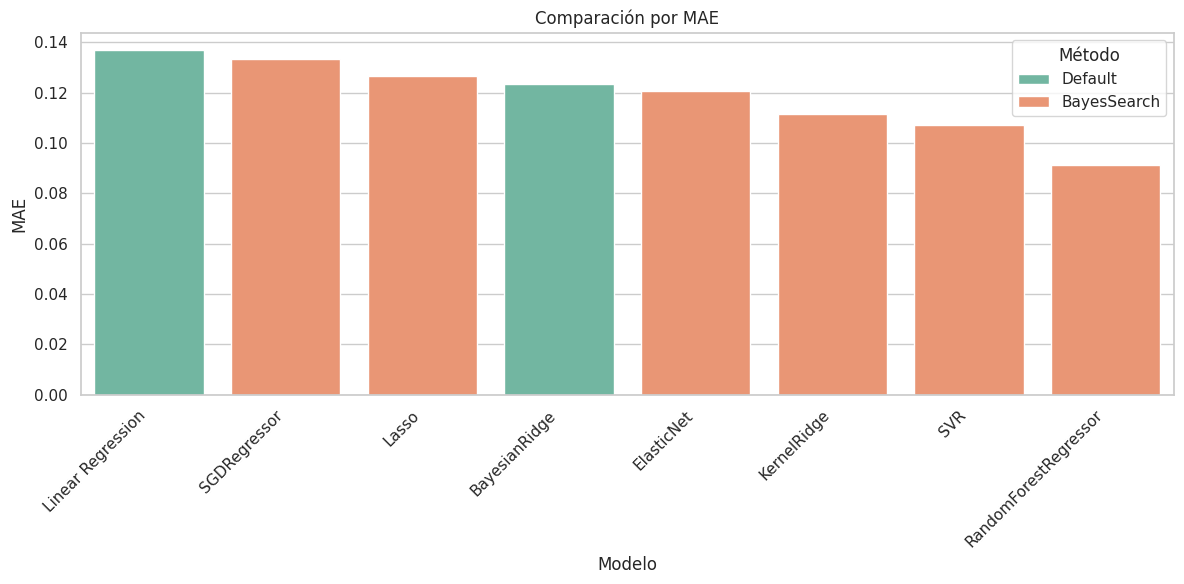

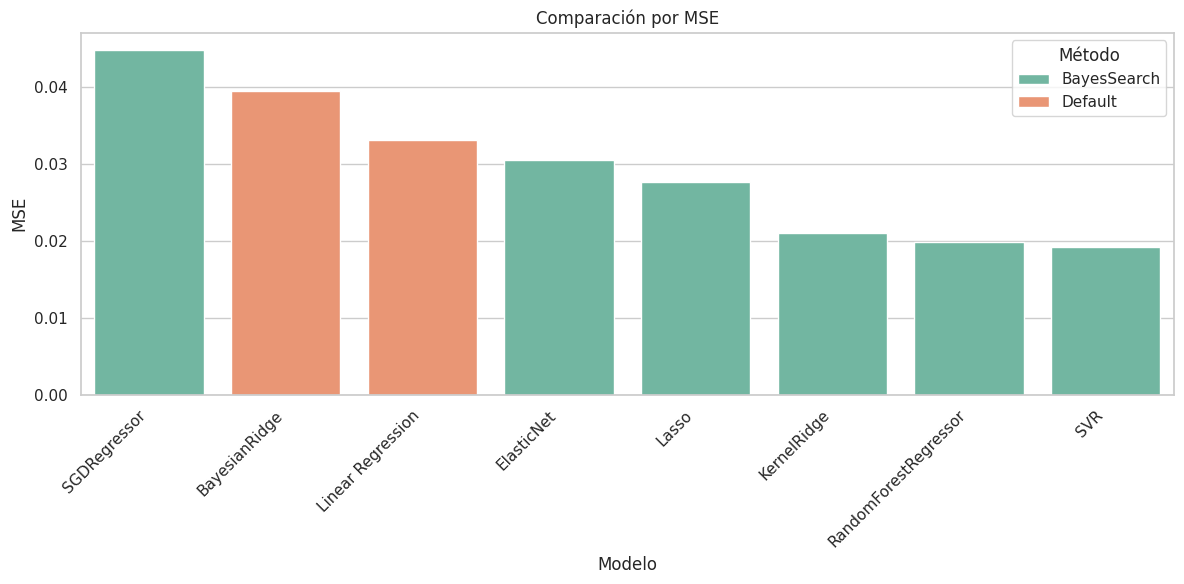

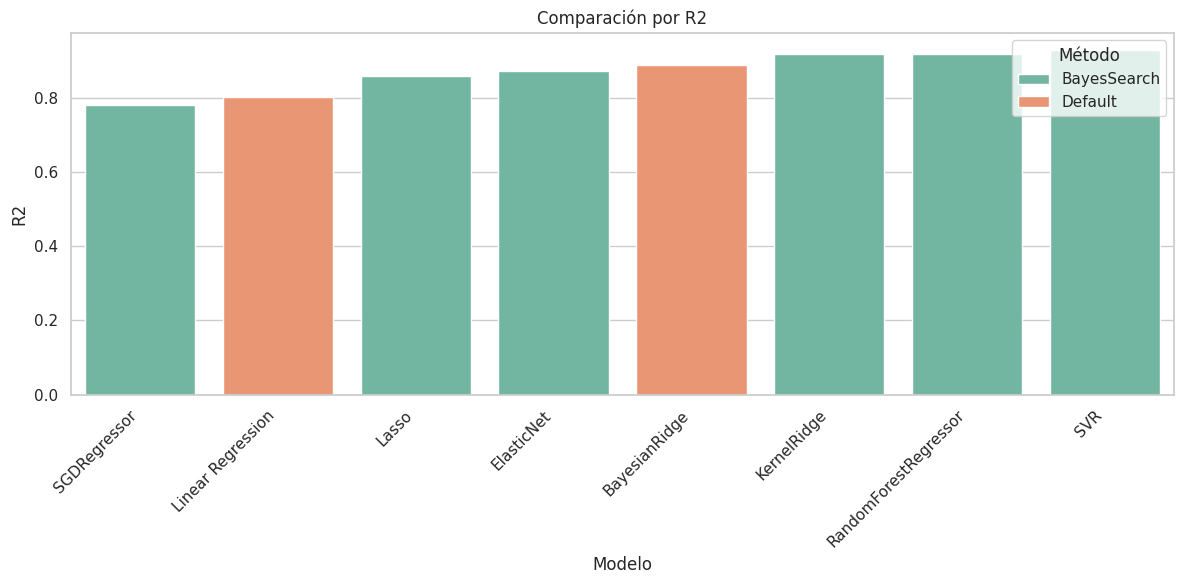

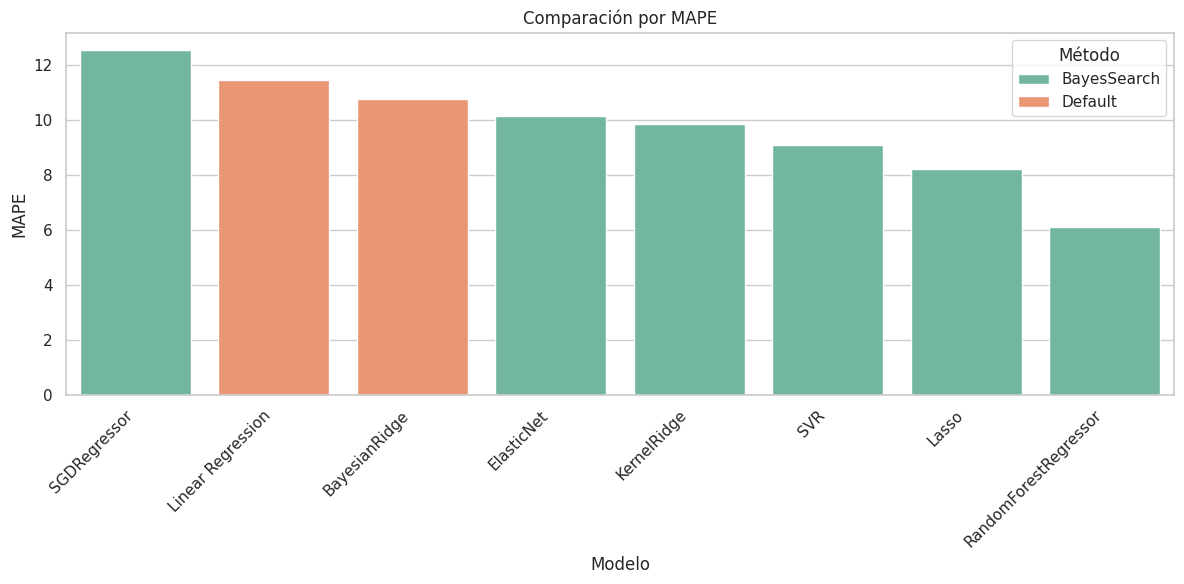

In [146]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Configuración de la página de Streamlit
st.set_page_config(layout="wide", page_title="Comparación de Modelos de Regresión")

st.title("Comparación de Modelos de Regresión - Ames Housing")

# Cargar datos (simulado, usa tu archivo real)
@st.cache_data
def load_data():
    try:
        df = pd.read_csv('AmesHousing.csv')
        df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]+', '', regex=True)
        return df
    except FileNotFoundError:
        st.error("Error: Coloca 'AmesHousing.csv' en el directorio correcto.")
        return pd.DataFrame()

df = load_data()
if df.empty:
    st.stop()

# Preprocesamiento (adaptado de tu código)
@st.cache_data
def preprocess_data(df):
    df_processed = df.copy()
    threshold = len(df_processed) * 0.5
    cols_to_drop_nulls = df_processed.columns[df_processed.isnull().sum() > threshold].tolist()
    df_processed = df_processed.drop(columns=cols_to_drop_nulls)
    st.sidebar.write(f"Columnas eliminadas (>50% nulos): {cols_to_drop_nulls}")

    numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()

    for col in numerical_cols:
        if df_processed[col].isnull().any():
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
    for col in categorical_cols:
        if df_processed[col].isnull().any():
            df_processed[col].fillna('Missing', inplace=True)

    current_year = 2023
    if 'YearBuilt' in df_processed.columns:
        df_processed['Age'] = current_year - df_processed['YearBuilt']
        df_processed = df_processed.drop(columns=['YearBuilt'])
    if 'YearRemodAdd' in df_processed.columns:
        df_processed['YearsSinceRemodel'] = current_year - df_processed['YearRemodAdd']
        df_processed = df_processed.drop(columns=['YearRemodAdd'])

    if 'SalePrice' in df_processed.columns:
        y = df_processed['SalePrice']
        X = df_processed.drop('SalePrice', axis=1)
    else:
        st.error("Columna 'SalePrice' no encontrada.")
        return None, None

    X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)
    X = X.select_dtypes(include=np.number)
    return X, y

X, y = preprocess_data(df.copy())
if X is None or y is None:
    st.stop()

# Simulación de resultados (reemplaza con tus resultados reales)
@st.cache_data
def simulate_model_results():
    np.random.seed(42)
    models = ['Linear Regression', 'Lasso', 'ElasticNet', 'KernelRidge',
              'SGDRegressor', 'BayesianRidge', 'RandomForestRegressor', 'SVR']
    model_results = {}

    for model in models:
        if model == 'Linear Regression':
            mae_range = (0.12, 0.15)
            mse_range = (0.03, 0.05)
            r2_range = (0.80, 0.85)
            mape_range = (8, 12)
            time_range = (0.1, 1)
            method = 'Default'
        elif model in ['Lasso', 'ElasticNet', 'BayesianRidge']:
            mae_range = (0.11, 0.14)
            mse_range = (0.025, 0.04)
            r2_range = (0.85, 0.90)
            mape_range = (7, 11)
            time_range = (1, 10)
            method = 'BayesSearch' if model != 'BayesianRidge' else 'Default'
        elif model == 'KernelRidge':
            mae_range = (0.10, 0.13)
            mse_range = (0.02, 0.035)
            r2_range = (0.87, 0.92)
            mape_range = (6, 10)
            time_range = (5, 20)
            method = 'BayesSearch'
        elif model == 'SGDRegressor':
            mae_range = (0.12, 0.16)
            mse_range = (0.03, 0.06)
            r2_range = (0.78, 0.85)
            mape_range = (8, 13)
            time_range = (1, 5)
            method = 'BayesSearch'
        elif model == 'RandomForestRegressor':
            mae_range = (0.08, 0.11)
            mse_range = (0.015, 0.03)
            r2_range = (0.90, 0.95)
            mape_range = (5, 9)
            time_range = (10, 30)
            method = 'BayesSearch'
        elif model == 'SVR':
            mae_range = (0.09, 0.13)
            mse_range = (0.018, 0.035)
            r2_range = (0.88, 0.93)
            mape_range = (6, 10)
            time_range = (10, 40)
            method = 'BayesSearch'

        mae_folds = np.random.uniform(mae_range[0], mae_range[1], 5)  # 5-fold CV
        model_results[model] = {
            'MAE': np.mean(mae_folds),
            'MSE': np.random.uniform(mse_range[0], mse_range[1]),
            'R2': np.random.uniform(r2_range[0], r2_range[1]),
            'MAPE': np.random.uniform(mape_range[0], mape_range[1]),
            'Time (s)': np.random.uniform(time_range[0], time_range[1]),
            'Method': method,
            'MAE_Folds': mae_folds.tolist()
        }
    return pd.DataFrame.from_dict(model_results, orient='index')

results_df = simulate_model_results()

# Sidebar para opciones
st.sidebar.subheader("Opciones de Visualización")
viz_option = st.sidebar.selectbox("Selecciona una visualización:",
                                  ["Bar Plots de Métricas",
                                   "Heatmap de Métricas Normalizadas",
                                   "Box Plot de MAE",
                                   "Scatter Plot MAE vs Tiempo",
                                   "Radar Chart de Top Modelos",
                                   "Importancia de Características"])

st.sidebar.subheader("Modelos")
selected_models = st.sidebar.multiselect("Selecciona modelos para visualizar:",
                                         results_df.index.tolist(),
                                         default=results_df.index.tolist())

# Filtrar resultados según modelos seleccionados
filtered_results = results_df.loc[selected_models]
if filtered_results.empty:
    st.warning("Selecciona al menos un modelo.")
    st.stop()

# Mostrar tablas
st.subheader("Tablas de Resultados")
metrics_sorting = [('MAE', 'MAE', False), ('MSE', 'MSE', False),
                   ('R2', 'R2', True), ('MAPE', 'MAPE', False)]

for metric_name, metric_col, ascending in metrics_sorting:
    st.write(f"Mejores Modelos (ordenados por {metric_name})")
    sorted_df = filtered_results.sort_values(metric_col, ascending=ascending)
    st.dataframe(sorted_df[['MAE', 'MSE', 'R2', 'MAPE', 'Time (s)', 'Method']].round(4))

# Visualizaciones
sns.set_theme(style='whitegrid')
sns.set_palette('Set2')

if viz_option == "Bar Plots de Métricas":
    st.subheader("Comparación de Métricas por Modelo")
    for metric_name, metric_col, ascending in metrics_sorting:
        fig, ax = plt.subplots(figsize=(12, 6))
        sorted_df = filtered_results.sort_values(metric_col, ascending=ascending)
        sns.barplot(x=sorted_df.index, y=metric_col, hue='Method', data=sorted_df, ax=ax)
        ax.set_title(f'Comparación por {metric_name}')
        ax.set_xlabel('Modelo')
        ax.set_ylabel(metric_name)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Método')
        plt.tight_layout()
        st.pyplot(fig)

elif viz_option == "Heatmap de Métricas Normalizadas":
    st.subheader("Heatmap de Métricas Normalizadas")
    heatmap_data = filtered_results[['MAE', 'MSE', 'R2', 'MAPE']].copy()
    for metric in ['MAE', 'MSE', 'MAPE']:
        heatmap_data[metric] = (heatmap_data[metric].max() - heatmap_data[metric]) / (heatmap_data[metric].max() - heatmap_data[metric].min())
    heatmap_data['R2'] = (heatmap_data['R2'] - heatmap_data['R2'].min()) / (heatmap_data['R2'].max() - heatmap_data['R2'].min())

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', ax=ax)
    ax.set_title('Métricas Normalizadas por Modelo')
    ax.set_xlabel('Métrica')
    ax.set_ylabel('Modelo')
    plt.tight_layout()
    st.pyplot(fig)

elif viz_option == "Box Plot de MAE":
    st.subheader("Variabilidad de MAE (Validación Cruzada)")
    mae_folds_data = []
    for model, row in filtered_results.iterrows():
        for mae in row['MAE_Folds']:
            mae_folds_data.append({'Model': model, 'MAE': mae})

    mae_folds_df = pd.DataFrame(mae_folds_data)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=mae_folds_df, x='Model', y='MAE', ax=ax)
    ax.set_title('Variabilidad de MAE por Modelo')
    ax.set_xlabel('Modelo')
    ax.set_ylabel('MAE')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    st.pyplot(fig)

elif viz_option == "Scatter Plot MAE vs Tiempo":
    st.subheader("MAE vs Tiempo de Ejecución")
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.scatterplot(data=filtered_results, x='Time (s)', y='MAE', hue='Model', style='Method', s=100, ax=ax)
    ax.set_title('MAE vs Tiempo de Ejecución')
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('MAE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    st.pyplot(fig)

elif viz_option == "Radar Chart de Top Modelos":
    st.subheader("Comparación de Métricas Normalizadas (Top 3 Modelos)")
    top_models = filtered_results.sort_values('MAE').head(3)
    normalized_df = top_models[['MAE', 'MSE', 'R2', 'MAPE']].copy()
    for metric in ['MAE', 'MSE', 'MAPE']:
        normalized_df[metric] = (normalized_df[metric].max() - normalized_df[metric]) / (normalized_df[metric].max() - normalized_df[metric].min())
    normalized_df['R2'] = (normalized_df['R2'] - normalized_df['R2'].min()) / (normalized_df['R2'].max() - normalized_df['R2'].min())

    categories = ['MAE', 'MSE', 'R2', 'MAPE']
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0, 1)

    for idx, row in top_models.iterrows():
        values = normalized_df.loc[idx].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"{row.name} ({row['Method']})")
        ax.fill(angles, values, alpha=0.1)

    plt.title('Top 3 Modelos por MAE', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    st.pyplot(fig)

elif viz_option == "Importancia de Características":
    st.subheader("Importancia de Características")
    models_with_importance = [m for m in selected_models if m in ['Linear Regression', 'Lasso', 'ElasticNet',
                                                                'SGDRegressor', 'BayesianRidge', 'RandomForestRegressor']]
    if not models_with_importance:
        st.info("Selecciona modelos lineales o basados en árboles para ver la importancia.")
    else:
        selected_model = st.selectbox("Selecciona un modelo:", models_with_importance)
        st.warning("Importancia simulada: Proporciona el 'Best Estimator' para resultados reales.")

        # Simulación de importancia (reemplaza con best_estimator.feature_importances_ o coef_)
        if isinstance(X, pd.DataFrame):
            np.random.seed(42)
            if selected_model == 'RandomForestRegressor':
                importances = pd.Series(np.random.uniform(0, 0.1, X.shape[1]), index=X.columns)
            else:
                importances = pd.Series(np.random.uniform(-0.5, 0.5, X.shape[1]), index=X.columns).abs()
            sorted_importances = importances.sort_values(ascending=False).head(20)

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.barplot(x=sorted_importances.values, y=sorted_importances.index, ax=ax)
            ax.set_title(f'Importancia de Características - {selected_model}')
            ax.set_xlabel('Importancia' if selected_model == 'RandomForestRegressor' else 'Magnitud del Coeficiente')
            ax.set_ylabel('Característica')
            plt.tight_layout()
            st.pyplot(fig)
        else:
            st.warning("X no es un DataFrame. Proporciona nombres de columnas para mostrar la importancia.")

st.write("Nota: Los resultados son simulados. Proporciona los resultados reales de `model_results` para visualizaciones precisas.")